# Proyecto: Análisis de Ventas de Videojuegos

## Paso 1: Carga y exploración inicial de datos

En esta sección vamos a:
- Examinar la estructura del dataset
- Identificar valores ausentes
- Analizar los tipos de datos
- Contar valores únicos por columna

In [1]:
# Importar librerías necesarias
import pandas as pd
import numpy as np

In [5]:
# Cargar el dataset
games = pd.read_csv('data\games.csv')

In [6]:
# Extraer información general del dataset
print("Información general del dataset:")
games.info()

Información general del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [7]:
# Mostrar los primeros valores de los datos
games.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [8]:
# Identificar los nombres de las columnas
games.columns.tolist()

['Name',
 'Platform',
 'Year_of_Release',
 'Genre',
 'NA_sales',
 'EU_sales',
 'JP_sales',
 'Other_sales',
 'Critic_Score',
 'User_Score',
 'Rating']

In [9]:
# Verificar las dimensiones del dataset (filas, columnas)
games.shape

(16715, 11)

In [10]:
# Obtener estadísticas descriptivas de las variables numéricas
games.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


In [11]:
# Analizar valores ausentes por columna
print("Número de valores ausentes por columna:")
print()
print(games.isna().sum())

Número de valores ausentes por columna:

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64


In [12]:
# Analizar valores únicos por columna
print("Número de valores únicos por columna:")
print()
print(games.nunique())

Número de valores únicos por columna:

Name               11559
Platform              31
Year_of_Release       37
Genre                 12
NA_sales             402
EU_sales             307
JP_sales             244
Other_sales          155
Critic_Score          82
User_Score            96
Rating                 8
dtype: int64


### Hallazgos principales del Paso 1:

- El conjunto contiene **16,715 registros** y **11 columnas**.  
- Se identifican valores ausentes en `Year_of_Release` (1.6%), `Name` y `Genre` (<0.02%), y de forma más significativa en `Critic_Score` (51%), `User_Score` (40%) y `Rating` (40%).  
- Las columnas de ventas (`NA_sales`, `EU_sales`, `JP_sales`, `Other_sales`) están completas y son de tipo numérico.  
- `User_Score` y `Rating` presentan tipo `object`; se recomienda conversión o limpieza previa al análisis.
- `Year_of_Release` y `Critic_Score` presentan tipo `float`; se recomienda convertir a `Int64` ya que ambas columnas contienen números enteros, así como valores ausentes.
- El conjunto abarca **37 años de lanzamiento**, **31 plataformas**, **12 géneros** y **8 categorías de clasificación**.  
- En general, los datos presentan buena cobertura, aunque requieren **tratamiento de valores nulos y estandarización de tipos** antes de los análisis estadísticos.

## Paso 2: Preparación de datos

En esta sección vamos a:

- **Estandarizar nombres de columnas** para facilitar el acceso y evitar errores
- **Convertir tipos de datos** apropiados para análisis numéricos (`year_of_release` y `critic_score` a Int64)
- **Analizar y manejar valores ausentes** en todas las columnas del dataset
- **Evaluar patrones temporales y por plataforma** de los valores ausentes
- **Implementar estrategias específicas** de reemplazo según la naturaleza de cada variable
- **Crear variables derivadas** como la columna de ventas totales para análisis posteriores
- **Documentar decisiones** de limpieza y preparación para mantener la trazabilidad del proceso

### 2.1 Conversión a tipos de datos apropiados para el análisis

In [13]:
# Estandarizar nombres de columnas a minúsculas para facilitar el acceso y evitar errores
games.columns = games.columns.str.lower()
# Verificar que los cambios se aplicaron correctamente
games.columns.tolist()

['name',
 'platform',
 'year_of_release',
 'genre',
 'na_sales',
 'eu_sales',
 'jp_sales',
 'other_sales',
 'critic_score',
 'user_score',
 'rating']

In [14]:
# Convertir la columna year_of_release a Int64, permitiendo incluir valores ausentes
print("Tipos de datos de year_of_release antes de la conversión:", games['year_of_release'].dtype)
games['year_of_release'] = games['year_of_release'].astype('Int64')
print()
print("Tipos de datos de year_of_release después de la conversión:", games['year_of_release'].dtype)

Tipos de datos de year_of_release antes de la conversión: float64

Tipos de datos de year_of_release después de la conversión: Int64


In [15]:
# Convertir la columna critic_score a Int64, permitiendo incluir valores ausentes
print("Tipos de datos de critic_score antes de la conversión:", games['critic_score'].dtype)
games['critic_score'] = games['critic_score'].astype('Int64')
print()
print("Tipos de datos de critic_score después de la conversión:", games['critic_score'].dtype)

Tipos de datos de critic_score antes de la conversión: float64

Tipos de datos de critic_score después de la conversión: Int64


In [16]:
# Verificar valores únicos en user_score
print("Valores únicos en user_score:")
print(games['user_score'].value_counts())

Valores únicos en user_score:
user_score
tbd    2424
7.8     324
8       290
8.2     282
8.3     254
       ... 
1.3       2
1         2
0.9       2
0         1
9.7       1
Name: count, Length: 96, dtype: int64


In [17]:
# Verificar valores únicos en rating
print("Valores únicos en rating:")
print(games['rating'].value_counts())

Valores únicos en rating:
rating
E       3990
T       2961
M       1563
E10+    1420
EC         8
K-A        3
RP         3
AO         1
Name: count, dtype: int64


### Descripción del cambio de datos en columnas

- Los nombres de las columnas se estandarizaron a minúsculas para facilitar el acceso y evitar errores.
- Dado que las columnas `year_of_release` y `critic_score` contienen valores enteros, se ha decidido convertirlas al tipo de dato Int64. Esta modificación mejora la presentación de los datos y, al mismo tiempo, permite gestionar de manera adecuada los valores ausentes durante el desarrollo del proyecto.
- Se decidió mantener la columna `user_score` como tipo `object` por el momento, debido a la alta proporción de valores ausentes y la presencia de entradas no numéricas como 'tbd'. Dado que estos factores comprometen la calidad del dato, se opta por priorizar variables más consistentes, como critic_score, para los análisis iniciales. En etapas posteriores, se podrá considerar la limpieza y conversión de user_score si se determina que la muestra restante es representativa y adecuada para el análisis.
- Se decidió mantener la columna `rating` como tipo `object`, ya que sus valores corresponden a etiquetas categóricas del sistema de clasificación ESRB (por ejemplo, E, T, M, E10+), las cuales no poseen un significado numérico ni un orden estrictamente cuantitativo. Dado que representan categorías descriptivas y no variables continuas o discretas, conservar el tipo object permite preservar su naturaleza cualitativa y evitar interpretaciones estadísticas inapropiadas.

### 2.2. Manejo de valores ausentes

In [18]:
# Localizar los valores ausentes en 'name'
games_null = games[games['name'].isna()]

print("Registros con valores ausentes en 'name':")
print()
print(games_null)

Registros con valores ausentes en 'name':

      name platform  year_of_release genre  na_sales  eu_sales  jp_sales  \
659    NaN      GEN             1993   NaN      1.78      0.53      0.00   
14244  NaN      GEN             1993   NaN      0.00      0.00      0.03   

       other_sales  critic_score user_score rating  
659           0.08          <NA>        NaN    NaN  
14244         0.00          <NA>        NaN    NaN  


In [19]:
# Localizar los valores ausentes en 'genre'
genre_null = games[games['genre'].isna()]

print("Registros con valores ausentes en 'genre':")
print()
print(genre_null)

Registros con valores ausentes en 'genre':

      name platform  year_of_release genre  na_sales  eu_sales  jp_sales  \
659    NaN      GEN             1993   NaN      1.78      0.53      0.00   
14244  NaN      GEN             1993   NaN      0.00      0.00      0.03   

       other_sales  critic_score user_score rating  
659           0.08          <NA>        NaN    NaN  
14244         0.00          <NA>        NaN    NaN  


#### Análisis de registros duplicados potenciales

Durante el análisis de valores ausentes, se identificaron dos registros (índices **659** y **14244**) que presentan características muy similares:

- Ambos tienen valores ausentes en `name` y `genre`
- Comparten la misma plataforma (GEN) y año de lanzamiento (1993)
- Presentan patrones de ventas complementarios:
  - Registro 659: ventas en NA, EU y Other (sin ventas en JP)
  - Registro 14244: únicamente ventas en JP (0.03)

**Decisión:** Se mantienen ambos registros por separado, interpretando que el registro 14244 corresponde a una versión regional (japonesa/asiática) del mismo juego representado en el registro 659.

In [20]:
# Reemplazar valores ausentes en name con 'Unknown_Game_GEN_1993'
games['name'] = games['name'].fillna('Unknown_Game_GEN_1993')
# Verificar los cambios
print("Valores ausentes en name después del cambio:", games['name'].isna().sum())
print()
# Comprobar que los cambios se han realizado
print("Actualización de valores ausentes en name:")
print()
print(games[games['name'] == 'Unknown_Game_GEN_1993'])

Valores ausentes en name después del cambio: 0

Actualización de valores ausentes en name:

                        name platform  year_of_release genre  na_sales  \
659    Unknown_Game_GEN_1993      GEN             1993   NaN      1.78   
14244  Unknown_Game_GEN_1993      GEN             1993   NaN      0.00   

       eu_sales  jp_sales  other_sales  critic_score user_score rating  
659        0.53      0.00         0.08          <NA>        NaN    NaN  
14244      0.00      0.03         0.00          <NA>        NaN    NaN  


In [21]:
# Reemplazar valores ausentes en genre con 'Unknown'
games['genre'] = games['genre'].fillna('Unknown')
# Verificar los cambios
print("Valores ausentes en genre después del cambio:", games['genre'].isna().sum())
print()
# Comprobar que los cambios se han realizado
print("Actualización de valores ausentes en genre:")
print()
print(games[games['genre'] == 'Unknown'])

Valores ausentes en genre después del cambio: 0

Actualización de valores ausentes en genre:

                        name platform  year_of_release    genre  na_sales  \
659    Unknown_Game_GEN_1993      GEN             1993  Unknown      1.78   
14244  Unknown_Game_GEN_1993      GEN             1993  Unknown      0.00   

       eu_sales  jp_sales  other_sales  critic_score user_score rating  
659        0.53      0.00         0.08          <NA>        NaN    NaN  
14244      0.00      0.03         0.00          <NA>        NaN    NaN  


#### Estrategia de reemplazo para valores ausentes en name y genre

**Para `name`:** Se asignó el identificador `'Unknown_Game_GEN_1993'` para mantener la trazabilidad y contexto de estos registros (plataforma y año).

**Para `genre`:** Se utilizó `'Unknown'` como categoría para los géneros ausentes, permitiendo incluir estos registros en análisis posteriores sin perder información de ventas.

In [22]:
# Identificar los valores ausentes en year_of_release
year_null = games['year_of_release'].isna().sum()
print("Número de valores ausentes en year_of_release:", year_null)

Número de valores ausentes en year_of_release: 269


In [23]:
# Mostrar los primeros registros con valores ausentes
print("Ejemplo de registros con year_of_release ausente:")
print(games.loc[games['year_of_release'].isna(), ['name', 'platform', 'year_of_release']].head(10))

Ejemplo de registros con year_of_release ausente:
                                            name platform  year_of_release
183                              Madden NFL 2004      PS2             <NA>
377                             FIFA Soccer 2004      PS2             <NA>
456                   LEGO Batman: The Videogame      Wii             <NA>
475                   wwe Smackdown vs. Raw 2006      PS2             <NA>
609                               Space Invaders     2600             <NA>
627                                    Rock Band     X360             <NA>
657     Frogger's Adventures: Temple of the Frog      GBA             <NA>
678  LEGO Indiana Jones: The Original Adventures      Wii             <NA>
719                               Call of Duty 3      Wii             <NA>
805                                    Rock Band      Wii             <NA>


#### Análisis de valores ausentes en `year_of_release`

**Hallazgos:**  
Se identificaron **269 registros ausentes** (1.6% del dataset) en `year_of_release`, distribuidos en distintas plataformas y sin un patrón definido. La columna conserva el tipo **Int64**, adecuado para análisis temporales.

**Decisión:**  
Se opta por **mantener los valores ausentes**, ya que preservar el tipo numérico facilita cálculos y visualizaciones, y evita la pérdida de información relevante sobre ventas. En análisis posteriores, estos registros podrán excluirse mediante filtros cuando sea necesario.

In [24]:
# Identificar los valores ausentes en critic_score
critic_null = games['critic_score'].isna().sum()
print("Número de valores ausentes en critic_score:", critic_null)

Número de valores ausentes en critic_score: 8578


In [25]:
# Mostrar los primeros registros con valores ausentes
critic_missing = games.loc[games['critic_score'].isna(), ['name', 'platform', 'year_of_release', 'critic_score']].head(10)
print("Ejemplo de registros con critic_score ausente:")
print(critic_missing.head())

Ejemplo de registros con critic_score ausente:
                        name platform  year_of_release  critic_score
1          Super Mario Bros.      NES             1985          <NA>
4   Pokemon Red/Pokemon Blue       GB             1996          <NA>
5                     Tetris       GB             1989          <NA>
9                  Duck Hunt      NES             1984          <NA>
10                Nintendogs       DS             2005          <NA>


In [26]:
# Analizar la proporción de valores ausentes por década
# Primero, crear una columna de década para los juegos que tienen año
games_with_year = games[games['year_of_release'].notna()].copy()
games_with_year['decade'] = (games_with_year['year_of_release'] // 10) * 10

# Calcular proporción de valores ausentes por década
decade_analysis = games_with_year.groupby('decade').agg({
    'critic_score': ['count', lambda x: x.isna().sum(), 'size']
})

decade_analysis.columns = ['critic_scores_available', 'critic_scores_missing', 'total_games']

# Convertir a float antes de aplicar round()
decade_analysis['missing_percentage'] = (decade_analysis['critic_scores_missing'] / decade_analysis['total_games'] * 100).astype(float).round(1)

print("Análisis de critic_score por década:")
print(decade_analysis)

Análisis de critic_score por década:
        critic_scores_available  critic_scores_missing  total_games  \
decade                                                                
1980                          2                    203          205   
1990                         94                   1677         1771   
2000                       5575                   3618         9193   
2010                       2312                   2965         5277   

        missing_percentage  
decade                      
1980                  99.0  
1990                  94.7  
2000                  39.4  
2010                  56.2  


In [27]:
#Analizar proporción de valores ausentes por plataforma
platform_analysis = games.groupby('platform').agg({
    'critic_score': ['count', lambda x: x.isna().sum(), 'size']
})

platform_analysis.columns = ['critic_scores_available', 'critic_scores_missing', 'total_games']
platform_analysis['missing_percentage'] = (platform_analysis['critic_scores_missing'] / platform_analysis['total_games'] * 100).astype(float).round(1)

# Ordenar por porcentaje de valores ausentes
platform_analysis_sorted = platform_analysis.sort_values('missing_percentage')
print("Análisis de critic_score por plataforma (ordenado por % ausentes):")
print(platform_analysis_sorted)

Análisis de critic_score por plataforma (ordenado por % ausentes):
          critic_scores_available  critic_scores_missing  total_games  \
platform                                                                
XB                            725                     99          824   
GC                            448                    108          556   
PC                            715                    259          974   
X360                          916                    346         1262   
XOne                          169                     78          247   
PS4                           252                    140          392   
PS3                           820                    511         1331   
WiiU                           90                     57          147   
PS2                          1298                    863         2161   
GBA                           438                    384          822   
Wii                           585                    735 

In [28]:
# Crear una columna de ventas totales
games['total_sales'] = games[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum(axis=1)

# Comparar ventas promedio entre juegos con y sin critic_score
sales_comparison = games.groupby(games['critic_score'].isna())['total_sales'].agg(['mean', 'median', 'count'])
sales_comparison.index = ['Con critic_score', 'Sin critic_score']

print("Comparación de ventas entre juegos con y sin critic_score:")
print(sales_comparison)

Comparación de ventas entre juegos con y sin critic_score:
                      mean  median  count
Con critic_score  0.688754    0.25   8137
Sin critic_score  0.386025    0.12   8578


#### Análisis integral de valores ausentes en `critic_score`

**Contexto general:**
La columna `critic_score` presenta **8,578 valores ausentes** (51.3% del dataset), lo que requiere un análisis detallado para determinar la estrategia de manejo más apropiada.

**Hallazgos del análisis temporal:**
- **Décadas 1980-1990:** Valores ausentes extremadamente altos (99.0% y 94.7% respectivamente)
- **Década 2000:** Mejora significativa con 39.4% de valores ausentes
- **Década 2010:** Incremento a 56.2%, posiblemente por juegos recientes sin suficientes reseñas

**Hallazgos del análisis por plataforma:**
- **Plataformas modernas** (XB, GC, PC, X360): Menor proporción de ausentes (12.0% - 27.4%)
- **Plataformas clásicas** (NES, SNES, GB, N64, etc.): 100% de valores ausentes
- **Plataformas portátiles recientes** (DS, 3DS, PSV): Alta proporción de ausentes (66.7% - 72.1%)

**Hallazgos del análisis de ventas:**
- Juegos **con** `critic_score`: Ventas promedio de **0.69 millones** (mediana: 0.25)
- Juegos **sin** `critic_score`: Ventas promedio de **0.39 millones** (mediana: 0.12)
- Los juegos con puntuaciones críticas tienden a tener **mejores ventas**

**Decisión final:**
Se opta por **mantener los valores ausentes** en `critic_score` por las siguientes razones:

1. **Patrón sistemático:** Los ausentes siguen patrones lógicos (plataformas antiguas, épocas pre-internet)
2. **Preservación de datos:** Mantener 8,137 registros con puntuaciones válidas para análisis
3. **Flexibilidad analítica:** Permite análisis segmentados según disponibilidad de datos
4. **Análisis pendientes:** Las columnas `user_score` y `rating` también requieren evaluación y podrían complementar el análisis

Esta estrategia permite aprovechar al máximo la información disponible mientras se preserva la integridad del dataset para análisis posteriores.

In [29]:
# Identificar los valores ausentes en user_score
user_null = games['user_score'].isna().sum()
print("Número de valores ausentes en user_score:", user_null)

Número de valores ausentes en user_score: 6701


In [30]:
# Mostrar los primeros registros con valores ausentes
user_missing = games.loc[games['user_score'].isna(), ['name', 'platform', 'year_of_release', 'critic_score', 'user_score']].head(10)
print("Ejemplo de registros con user_score ausente:")
print(user_missing.head())

Ejemplo de registros con user_score ausente:
                        name platform  year_of_release  critic_score  \
1          Super Mario Bros.      NES             1985          <NA>   
4   Pokemon Red/Pokemon Blue       GB             1996          <NA>   
5                     Tetris       GB             1989          <NA>   
9                  Duck Hunt      NES             1984          <NA>   
10                Nintendogs       DS             2005          <NA>   

   user_score  
1         NaN  
4         NaN  
5         NaN  
9         NaN  
10        NaN  


In [31]:
# Analizar la proporción de valores ausentes por década
# Primero, crear una columna de década para los juegos que tienen año
games_with_year_user = games[games['year_of_release'].notna()].copy()
games_with_year_user['decade'] = (games_with_year_user['year_of_release'] // 10) * 10

# Calcular proporción de valores ausentes por década
decade_analysis_user = games_with_year_user.groupby('decade').agg({
    'user_score': ['count', lambda x: x.isna().sum(), 'size']
})

decade_analysis_user.columns = ['user_scores_available', 'user_scores_missing', 'total_games']

# Convertir a float antes de aplicar round()
decade_analysis_user['missing_percentage'] = (decade_analysis_user['user_scores_missing'] / decade_analysis_user['total_games'] * 100).astype(float).round(1)

print("Análisis de user_score por década:")
print(decade_analysis_user)

Análisis de user_score por década:
        user_scores_available  user_scores_missing  total_games  \
decade                                                            
1980                        2                  203          205   
1990                       99                 1672         1771   
2000                     6559                 2634         9193   
2010                     3179                 2098         5277   

        missing_percentage  
decade                      
1980                  99.0  
1990                  94.4  
2000                  28.7  
2010                  39.8  


In [32]:
# Crear la tabla comparativa de missing percentages
comparison_missing = pd.DataFrame({
    'critic_score_missing_%': decade_analysis['missing_percentage'],
    'user_score_missing_%': decade_analysis_user['missing_percentage']
})

print("Comparación de porcentajes de valores ausentes por década:")
print(comparison_missing)
print()
print("Tabla transpuesta para mejor visualización:")
print(comparison_missing.T)

Comparación de porcentajes de valores ausentes por década:
        critic_score_missing_%  user_score_missing_%
decade                                              
1980                      99.0                  99.0
1990                      94.7                  94.4
2000                      39.4                  28.7
2010                      56.2                  39.8

Tabla transpuesta para mejor visualización:
decade                  1980  1990  2000  2010
critic_score_missing_%  99.0  94.7  39.4  56.2
user_score_missing_%    99.0  94.4  28.7  39.8


In [33]:
# Analizar proporción de valores ausentes en user_score por plataforma
platform_user_analysis = games.groupby('platform').agg({
    'user_score': ['count', lambda x: x.isna().sum(), 'size']
})
platform_user_analysis.columns = ['user_scores_available', 'user_scores_missing', 'total_games']
platform_user_analysis['missing_percentage'] = (platform_user_analysis['user_scores_missing'] / platform_user_analysis['total_games'] * 100).astype(float).round(1)

# Ordenar por porcentaje de valores ausentes
platform_user_analysis_sorted = platform_user_analysis.sort_values('missing_percentage')
print("Análisis de user_score por plataforma (ordenado por % ausentes):")
print(platform_user_analysis_sorted)

Análisis de user_score por plataforma (ordenado por % ausentes):
          user_scores_available  user_scores_missing  total_games  \
platform                                                            
XB                          736                   88          824   
GC                          469                   87          556   
PC                          819                  155          974   
X360                       1050                  212         1262   
XOne                        193                   54          247   
Wii                        1000                  320         1320   
PS3                         964                  367         1331   
WiiU                        105                   42          147   
PS2                        1481                  680         2161   
PS4                         263                  129          392   
GBA                         517                  305          822   
DS                         1272       

In [34]:
# Crear la tabla comparativa de missing percentages por plataforma
platform_comparison_missing = pd.DataFrame({
    'critic_score_missing_%': platform_analysis['missing_percentage'],
    'user_score_missing_%': platform_user_analysis['missing_percentage']
})

# Ordenar por el porcentaje de critic_score 
platform_comparison_missing_sorted = platform_comparison_missing.sort_values('critic_score_missing_%')

print("Comparación de porcentajes de valores ausentes por plataforma (ordenado por critic_score):")
print(platform_comparison_missing_sorted)

Comparación de porcentajes de valores ausentes por plataforma (ordenado por critic_score):
          critic_score_missing_%  user_score_missing_%
platform                                              
XB                          12.0                  10.7
GC                          19.4                  15.6
PC                          26.6                  15.9
X360                        27.4                  16.8
XOne                        31.6                  21.9
PS4                         35.7                  32.9
PS3                         38.4                  27.6
WiiU                        38.8                  28.6
PS2                         39.9                  31.5
GBA                         46.7                  37.1
Wii                         55.7                  24.2
PSP                         61.8                  55.0
DS                          66.7                  40.9
3DS                         67.7                  55.8
PSV                         7

In [35]:
# Filtrar registros que tienen ambos valores
both_scores = games.dropna(subset=['critic_score', 'user_score'])
both_scores_clean = both_scores[both_scores['user_score'] != 'tbd'].copy()
both_scores_clean['user_score_numeric'] = pd.to_numeric(both_scores_clean['user_score'])

print(f"Registros con ambas puntuaciones válidas: {len(both_scores_clean)}")
print()

# Convertir a arrays de numpy estándar para evitar el error
critic_values = both_scores_clean['critic_score'].astype(float).values
user_values = both_scores_clean['user_score_numeric'].astype(float).values

# Calcular correlación
correlation = np.corrcoef(critic_values, user_values)[0, 1]
print(f"Correlación entre critic_score y user_score: {correlation:.3f}")
print()

# Mostrar estadísticas básicas
print("Estadísticas comparativas:")
comparison_stats = both_scores_clean[['critic_score', 'user_score_numeric']].describe()
print(comparison_stats)

Registros con ambas puntuaciones válidas: 7017

Correlación entre critic_score y user_score: 0.581

Estadísticas comparativas:
       critic_score  user_score_numeric
count        7017.0         7017.000000
mean      70.249822            7.182428
std       13.880646            1.441241
min            13.0            0.500000
25%            62.0            6.500000
50%            72.0            7.500000
75%            80.0            8.200000
max            98.0            9.600000


#### Análisis integral de valores ausentes en `user_score`

**Contexto general:**
La columna `user_score` presenta **6,701 valores ausentes** (40.1% del dataset) y **2,424 valores 'tbd'** (14.5% del dataset), lo que representa un total de **9,125 registros sin puntuación válida** (54.6%).

**Hallazgos del análisis temporal:**
- **Décadas 1980-1990:** Valores ausentes extremadamente altos (99.0% y 94.4% respectivamente)
- **Década 2000:** Mejor cobertura con 28.7% de valores ausentes (vs 39.4% en critic_score)
- **Década 2010:** 39.8% de valores ausentes (vs 56.2% en critic_score)

**Hallazgos del análisis por plataforma:**
- **Plataformas modernas** (XB, GC, PC, X360): Menor proporción de ausentes (10.7% - 21.9%)
- **Plataformas clásicas** (NES, SNES, GB, N64, etc.): 100% de valores ausentes
- **Patrón consistente:** user_score presenta mejor cobertura que critic_score en plataformas modernas

**Correlación entre puntuaciones:**
- **Correlación positiva moderada-fuerte** entre critic_score y user_score
- Los patrones temporales y por plataforma son **altamente similares** entre ambas variables
- Ambas variables siguen la **evolución de la industria gaming** y la adopción de internet

**Decisión final:**
Se mantienen los valores ausentes y 'tbd' en `user_score` por:
1. **Patrón sistemático:** Los ausentes reflejan limitaciones históricas y tecnológicas
2. **Complementariedad:** user_score ofrece mejor cobertura que critic_score en ciertos períodos
3. **Correlación confirmada:** Ambas variables muestran patrones consistentes
4. **Flexibilidad analítica:** Permite análisis segmentados según disponibilidad de datos

Los valores 'tbd' se interpretan como juegos sin suficientes reseñas de usuarios al momento de la recopilación de datos, posiblemente por ser muy nuevos, muy antiguos, o por problemas técnicos de la plataforma de reseñas.

In [36]:
# Identificar los valores ausentes en rating
rating_null = games['rating'].isna().sum()
print("Número de valores ausentes en rating:", rating_null)

Número de valores ausentes en rating: 6766


In [37]:
# Mostrar los primeros registros con valores ausentes
rating_missing = games.loc[games['user_score'].isna(), ['name', 'platform', 'year_of_release', 'critic_score', 'user_score', 'rating']].head(10)
print("Ejemplo de registros con rating ausente:")
print(rating_missing.head())

Ejemplo de registros con rating ausente:
                        name platform  year_of_release  critic_score  \
1          Super Mario Bros.      NES             1985          <NA>   
4   Pokemon Red/Pokemon Blue       GB             1996          <NA>   
5                     Tetris       GB             1989          <NA>   
9                  Duck Hunt      NES             1984          <NA>   
10                Nintendogs       DS             2005          <NA>   

   user_score rating  
1         NaN    NaN  
4         NaN    NaN  
5         NaN    NaN  
9         NaN    NaN  
10        NaN    NaN  


In [38]:
# Analizar patrones temporales de rating 
games_with_year_rating = games[games['year_of_release'].notna()].copy()
games_with_year_rating['decade'] = (games_with_year_rating['year_of_release'] // 10) * 10

decade_analysis_rating = games_with_year_rating.groupby('decade').agg({
    'rating': ['count', lambda x: x.isna().sum(), 'size']
})
decade_analysis_rating.columns = ['ratings_available', 'ratings_missing', 'total_games']
decade_analysis_rating['missing_percentage'] = (decade_analysis_rating['ratings_missing'] / decade_analysis_rating['total_games'] * 100).astype(float).round(1)

print("Análisis de rating por década:")
print(decade_analysis_rating)

Análisis de rating por década:
        ratings_available  ratings_missing  total_games  missing_percentage
decade                                                                     
1980                    2              203          205                99.0
1990                  103             1668         1771                94.2
2000                 6550             2643         9193                28.8
2010                 3113             2164         5277                41.0


In [39]:
# Analizar proporción de valores ausentes en rating por plataforma
platform_rating_analysis = games.groupby('platform').agg({
    'rating': ['count', lambda x: x.isna().sum(), 'size']
})
platform_rating_analysis.columns = ['ratings_available', 'ratings_missing', 'total_games']
platform_rating_analysis['missing_percentage'] = (platform_rating_analysis['ratings_missing'] / platform_rating_analysis['total_games'] * 100).astype(float).round(1)

# Ordenar por porcentaje de valores ausentes
platform_rating_analysis_sorted = platform_rating_analysis.sort_values('missing_percentage')
print("Análisis de rating por plataforma (ordenado por % ausentes):")
print(platform_rating_analysis_sorted)

Análisis de rating por plataforma (ordenado por % ausentes):
          ratings_available  ratings_missing  total_games  missing_percentage
platform                                                                     
XB                      733               91          824                11.0
GC                      469               87          556                15.6
X360                   1052              210         1262                16.6
PC                      774              200          974                20.5
Wii                    1002              318         1320                24.1
XOne                    186               61          247                24.7
PS3                     952              379         1331                28.5
WiiU                    105               42          147                28.6
PS2                    1481              680         2161                31.5
PS4                     255              137          392                34.9
GBA

In [40]:
# Crear análisis de rating por plataforma 
platform_rating_analysis = games.groupby('platform').agg({
    'rating': ['count', lambda x: x.isna().sum(), 'size']
})
platform_rating_analysis.columns = ['ratings_available', 'ratings_missing', 'total_games']
platform_rating_analysis['missing_percentage'] = (platform_rating_analysis['ratings_missing'] / platform_rating_analysis['total_games'] * 100).astype(float).round(1)

# Crear la tabla comparativa completa con las tres columnas
missing_comparison_table = pd.DataFrame({
    'critic_score_missing_%': platform_analysis['missing_percentage'],
    'user_score_missing_%': platform_user_analysis['missing_percentage'],
    'rating_missing_%': platform_rating_analysis['missing_percentage']
})

# Ordenar por critic_score para mantener consistencia
missing_comparison_sorted = missing_comparison_table.sort_values('critic_score_missing_%')

print("Comparación de porcentajes de valores ausentes por plataforma:")
print("(Ordenado por critic_score missing %)")
print()
print(missing_comparison_sorted)

Comparación de porcentajes de valores ausentes por plataforma:
(Ordenado por critic_score missing %)

          critic_score_missing_%  user_score_missing_%  rating_missing_%
platform                                                                
XB                          12.0                  10.7              11.0
GC                          19.4                  15.6              15.6
PC                          26.6                  15.9              20.5
X360                        27.4                  16.8              16.6
XOne                        31.6                  21.9              24.7
PS4                         35.7                  32.9              34.9
PS3                         38.4                  27.6              28.5
WiiU                        38.8                  28.6              28.6
PS2                         39.9                  31.5              31.5
GBA                         46.7                  37.1              36.5
Wii                   

In [41]:
# Reemplazar valores ausentes en rating con 'Undefined'
games['rating'] = games['rating'].fillna('Undefined')
print("Valores ausentes en rating después del cambio:", games['rating'].isna().sum())

Valores ausentes en rating después del cambio: 0


#### Análisis integral de valores ausentes en `rating`

**Contexto general:**
La columna `rating` presenta **6,766 valores ausentes** (40.5% del dataset), siguiendo patrones muy similares a las columnas `critic_score` y `user_score`.

**Hallazgos del análisis temporal:**
- **Décadas 1980-1990:** Valores ausentes extremadamente altos (99.0% y 94.2% respectivamente)
- **Década 2000:** Mejor cobertura con 28.8% de valores ausentes
- **Década 2010:** 41.0% de valores ausentes

**Hallazgos del análisis por plataforma:**
- **Plataformas modernas** (XB, GC, X360, PC): Menor proporción de ausentes (11.0% - 20.5%)
- **Plataformas clásicas** (NES, SNES, GB, N64, etc.): 100% de valores ausentes
- **Patrón altamente correlacionado:** Los porcentajes de valores ausentes en `rating` son muy similares a los de `user_score` y `critic_score`

**Correlación entre variables:**
Las tres columnas (`critic_score`, `user_score`, `rating`) muestran patrones de valores ausentes **altamente correlacionados**, sugiriendo que:
- Los datos provienen de fuentes similares o complementarias
- La disponibilidad de información sigue la evolución tecnológica de la industria
- Los juegos más antiguos carecen sistemáticamente de estas métricas

**Decisión final:**
Se reemplazan los valores ausentes con `'Undefined'` para:
1. **Mantener consistencia:** Preservar todos los registros para análisis de ventas
2. **Facilitar análisis categórico:** Permitir agrupaciones que incluyan juegos sin clasificación
3. **Interpretación clara:** `'Undefined'` indica explícitamente la ausencia de clasificación ESRB
4. **Flexibilidad:** Permite análisis tanto incluyendo como excluyendo esta categoría

#### Estrategia de reemplazo para valores ausentes en `rating`
Se asignó la categoría `'Undefined'` para los valores ausentes, manteniendo la naturaleza categórica de la variable mientras se preserva la información de que estos juegos no tienen clasificación ESRB disponible.

### 2.3 Creación de variables derivadas

#### Columna de ventas totales
Para facilitar análisis posteriores, se crea una nueva columna que suma las ventas de todas las regiones:

In [43]:
# Crear una columna de ventas totales
games['total_sales'] = games[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum(axis=1)

# Verificar la creación de la columna
print("Estadísticas de ventas totales:")
print(games['total_sales'].describe())

Estadísticas de ventas totales:
count    16715.000000
mean         0.533396
std          1.548261
min          0.000000
25%          0.060000
50%          0.170000
75%          0.470000
max         82.540000
Name: total_sales, dtype: float64


### Hallazgos principales del paso 2

- Los nombres de columnas se estandarizaron en minúsculas para evitar errores y facilitar su uso.  
- Las columnas `year_of_release` y `critic_score` se convirtieron al tipo **Int64**, permitiendo cálculos numéricos y gestión de valores ausentes sin perder información.  
- Se mantuvo `user_score` como **object** por la presencia de valores `'tbd'` y ausentes, posponiendo su limpieza hasta confirmar la representatividad de los datos.  
- La columna `rating` se conservó como **object**, ya que representa categorías cualitativas (E, T, M, etc.) sin valor numérico.  
- Se identificaron dos registros similares en la plataforma **GEN (1993)** con diferencias en distribución de ventas; se mantuvieron ambos al considerarse versiones regionales distintas.  
- Se reemplazaron valores ausentes en `name` con `'Unknown_Game_GEN_1993'` y en `genre` con `'Unknown'` para conservar trazabilidad y permitir análisis posteriores.  
- Se detectaron **269 valores ausentes (1.6%)** en `year_of_release`; se decidió mantenerlos para conservar integridad y permitir análisis flexibles.  
- `critic_score` presenta **8,578 valores ausentes (51.3%)**, con un patrón lógico asociado a plataformas antiguas y juegos pre-internet; se mantienen los ausentes por su relevancia analítica.  
- `user_score` muestra **9,125 registros sin puntuación válida (54.6%)**, incluyendo `'tbd'`; se mantienen para futuros análisis al presentar buena correlación con `critic_score`.  
- `rating` presenta **6,766 valores ausentes (40.5%)**, con patrones similares a las puntuaciones; los valores se reemplazaron por `'Undefined'` para mantener consistencia categórica.  
- Se creó una nueva columna **`total_sales`** sumando ventas por región, con una media de **0.53 millones** y máximo de **82.54 millones**, para facilitar análisis globales.

## Paso 3: Análisis de datos

En esta sección vamos a:

- **Analizar lanzamientos por año** para identificar períodos significativos y evaluar la relevancia de los datos
- **Examinar ventas por plataforma** y construir distribuciones basadas en datos anuales
- **Identificar plataformas históricamente populares** que ahora no tienen ventas y analizar ciclos de vida
- **Determinar el período relevante** para construir un modelo predictivo para 2017
- **Seleccionar plataformas líderes actuales** y identificar cuáles crecen o se reducen
- **Crear diagramas de caja** para comparar ventas globales entre plataformas
- **Analizar correlaciones** entre reseñas de usuarios/críticos y ventas en plataformas populares
- **Estudiar la distribución por géneros** e identificar los más rentables
- **Comparar ventas** de los mismos juegos entre diferentes plataformas
- **Establecer conclusiones** sobre patrones de éxito y factores determinantes

### 3.1. Análisis temporal de lanzamientos

In [44]:
# Análisis de lanzamientos por año
# Filtrar juegos con año conocido
games_with_year = games[games['year_of_release'].notna()].copy()

# Contar lanzamientos por año
yearly_releases = games_with_year['year_of_release'].value_counts().sort_index()

print("Lanzamientos por año (primeros y últimos 10):")
print("Primeros 10 años:")
print(yearly_releases.head(10))
print("\nÚltimos 10 años:")
print(yearly_releases.tail(10))

print(f"\nTotal de juegos con año conocido: {len(games_with_year)}")
print(f"Rango temporal: {yearly_releases.index.min()} - {yearly_releases.index.max()}")

Lanzamientos por año (primeros y últimos 10):
Primeros 10 años:
year_of_release
1980     9
1981    46
1982    36
1983    17
1984    14
1985    14
1986    21
1987    16
1988    15
1989    17
Name: count, dtype: Int64

Últimos 10 años:
year_of_release
2007    1197
2008    1427
2009    1426
2010    1255
2011    1136
2012     653
2013     544
2014     581
2015     606
2016     502
Name: count, dtype: Int64

Total de juegos con año conocido: 16446
Rango temporal: 1980 - 2016


### Análisis sobre los lanzamientos por año

- El rango temporal de los datos abarca **36 años**, desde **1980 hasta 2016**, lo que cubre casi toda la historia moderna de la industria del videojuego.  
- Los **primeros años (1980–1989)** muestran una baja cantidad de lanzamientos anuales (entre 9 y 46), reflejando los inicios de la industria y la limitada producción de títulos en plataformas de esa época.  
- A partir de la década de **2000–2010** se observa un crecimiento pronunciado, alcanzando un **máximo entre 2007 y 2010**, con más de **1,200 lanzamientos anuales**.  
- Este pico coincide con la expansión de consolas como **Xbox 360, PlayStation 3 y Nintendo Wii**, junto con el auge de la distribución global y el desarrollo multiplataforma.  
- Después de **2010**, se nota una **disminución gradual** en el número de lanzamientos, posiblemente por:
  - Consolidación de grandes estudios y reducción de lanzamientos menores.  
  - Transición hacia plataformas digitales y móviles no incluidas en el dataset.  
  - Cambios en la generación de consolas (transición a PS4/XOne).  
- En total, existen **16,446 juegos con año de lanzamiento conocido**, lo que representa **el 98.4% del dataset**, un nivel de cobertura temporal adecuado para análisis de tendencias a largo plazo.

### 3.2. Análisis de ventas por plataforma

In [45]:
# Calcular ventas totales por plataforma
platform_sales = games.groupby('platform')['total_sales'].sum().sort_values(ascending=False)

print("Ventas totales por plataforma:")
print(platform_sales)
print(f"Total de plataformas: {len(platform_sales)}")

Ventas totales por plataforma:
platform
PS2     1255.77
X360     971.42
PS3      939.65
Wii      907.51
DS       806.12
PS       730.86
GBA      317.85
PS4      314.14
PSP      294.05
PC       259.52
3DS      259.00
XB       257.74
GB       255.46
NES      251.05
N64      218.68
SNES     200.04
GC       198.93
XOne     159.32
2600      96.98
WiiU      82.19
PSV       54.07
SAT       33.59
GEN       30.77
DC        15.95
SCD        1.86
NG         1.44
WS         1.42
TG16       0.16
3DO        0.10
GG         0.04
PCFX       0.03
Name: total_sales, dtype: float64
Total de plataformas: 31


### Descripción de los hallazgos sobre ventas totales por plataforma

- El dataset incluye **31 plataformas** distintas, lo que refleja una amplia cobertura histórica de consolas, portátiles y PC.  
- Las **ventas están fuertemente concentradas** en unas pocas plataformas, destacando un patrón claro de dominio por parte de **Sony**, **Microsoft** y **Nintendo**.  
- **PlayStation 2 (PS2)** lidera con **1,255.77 millones de copias vendidas**, consolidándose como la plataforma más exitosa de la historia en términos de ventas totales.  
- Le siguen **Xbox 360 (971.42)**, **PlayStation 3 (939.65)** y **Wii (907.51)**, todas pertenecientes a la **misma generación (2000–2010)**, lo que coincide con el período de mayor producción y consumo de videojuegos.  
- Las consolas **portátiles** como **DS (806.12)** y **GBA (317.85)** muestran una participación significativa, evidenciando la relevancia del mercado handheld en esa época.  
- **Plataformas clásicas** como **NES (251.05)**, **SNES (200.04)** y **N64 (218.68)** presentan cifras más bajas, coherentes con su menor número de lanzamientos y mercados más limitados en su tiempo.  
- En contraste, plataformas de **nicho o corta vida útil** (p. ej. **PCFX**, **GG**, **3DO**, **TG16**) registran ventas prácticamente nulas (<2 millones), representando solo una fracción marginal del total.  
- En conjunto, los datos muestran una **alta concentración del mercado** en pocas consolas de gran éxito comercial, mientras que la mayoría de las plataformas tuvieron un impacto limitado en las ventas globales.

### 3.3 Análisis de plataformas relevantes para 2017

In [46]:
# Analizar ventas por plataforma en los últimos años vs años anteriores
recent_years = games[games['year_of_release'] >= 2014]  # Años recientes
older_years = games[games['year_of_release'] < 2014]   # Años anteriores

# Ventas por plataforma en cada período
recent_platform_sales = recent_years.groupby('platform')['total_sales'].sum().sort_values(ascending=False)
older_platform_sales = older_years.groupby('platform')['total_sales'].sum().sort_values(ascending=False)

print("Top 10 plataformas en años recientes (2014-2016):")
print(recent_platform_sales.head(10))
print("\nTop 10 plataformas históricamente (antes de 2014):")
print(older_platform_sales.head(10))

Top 10 plataformas en años recientes (2014-2016):
platform
PS4     288.15
XOne    140.36
3DS      86.68
PS3      68.18
X360     48.22
WiiU     42.98
PC       27.05
PSV      22.40
Wii       5.07
PSP       0.36
Name: total_sales, dtype: float64

Top 10 plataformas históricamente (antes de 2014):
platform
PS2     1233.56
X360     913.02
Wii      886.11
PS3      863.16
DS       802.78
PS       727.58
GBA      312.88
PSP      289.17
GB       254.43
XB       251.57
Name: total_sales, dtype: float64


In [47]:
# Plataformas que estaban en top histórico pero no en recientes
historical_top = set(older_platform_sales.head(10).index)
recent_top = set(recent_platform_sales.head(10).index)

declining_platforms = historical_top - recent_top
print(f"Plataformas en declive: {declining_platforms}")

Plataformas en declive: {'DS', 'PS2', 'GBA', 'GB', 'XB', 'PS'}


### Análisis prospectivo de plataformas — Proyección 2017

Con los datos hasta 2016, se observa una **transición generacional** en la industria. Las consolas históricas como **PS2**, **Wii** y **Xbox 360** han quedado obsoletas, mientras que **PS4** y **Xbox One** lideran las ventas recientes.

Entre 2014 y 2016, **PS4** domina con 288.15 millones de unidades, seguida de **Xbox One** (140.36 M) y **3DS** (86.68 M). **PS3** y **X360** descienden al final de su ciclo, mientras **PC** mantiene estabilidad gracias al mercado digital.

Históricamente, **PS2**, **Wii** y **DS** concentraron las mayores ventas, pero ya no muestran actividad comercial. Las plataformas **DS**, **PS2**, **GBA**, **XB**, **PS** y **GB** se consideran en declive definitivo.

Para 2017 se proyecta que **PS4** seguirá en expansión, **Xbox One** conservará crecimiento moderado y **3DS** iniciará una leve baja. El resto de las plataformas mantendrán una tendencia descendente.

En conclusión, la evidencia apunta a una **consolidación de PS4 y Xbox One como principales plataformas comerciales**, mientras que los sistemas previos pierden relevancia estratégica.

### 3.4. Selección de plataformas líderes actuales

In [48]:
# Seleccionar las plataformas potencialmente rentables identificadas en el paso 3.3
relevant_platforms = ['PS4', 'XOne', '3DS', 'PS3', 'X360']
platform_data = games[games['platform'].isin(relevant_platforms)]

print(f"Datos filtrados: {len(platform_data)} juegos en plataformas relevantes")
print(f"Distribución por plataforma:")
print(platform_data['platform'].value_counts())

Datos filtrados: 3752 juegos en plataformas relevantes
Distribución por plataforma:
platform
PS3     1331
X360    1262
3DS      520
PS4      392
XOne     247
Name: count, dtype: int64


In [49]:
# Análisis estadístico de diferencias entre plataformas
print("Estadísticas descriptivas por plataforma:")
platform_stats = platform_data.groupby('platform')['total_sales'].describe()
print(platform_stats)

print("\nComparación de medianas y medias:")
platform_summary = platform_data.groupby('platform')['total_sales'].agg(['mean', 'median', 'std']).round(3)
print(platform_summary)

Estadísticas descriptivas por plataforma:
           count      mean       std   min   25%   50%     75%    max
platform                                                             
3DS        520.0  0.498077  1.430876  0.01  0.05  0.12  0.3300  14.60
PS3       1331.0  0.705973  1.391749  0.00  0.11  0.27  0.7500  21.05
PS4        392.0  0.801378  1.609456  0.01  0.06  0.20  0.7300  14.63
X360      1262.0  0.769746  1.615674  0.01  0.11  0.28  0.7575  21.82
XOne       247.0  0.645020  1.036139  0.01  0.06  0.22  0.6850   7.39

Comparación de medianas y medias:
           mean  median    std
platform                      
3DS       0.498    0.12  1.431
PS3       0.706    0.27  1.392
PS4       0.801    0.20  1.609
X360      0.770    0.28  1.616
XOne      0.645    0.22  1.036


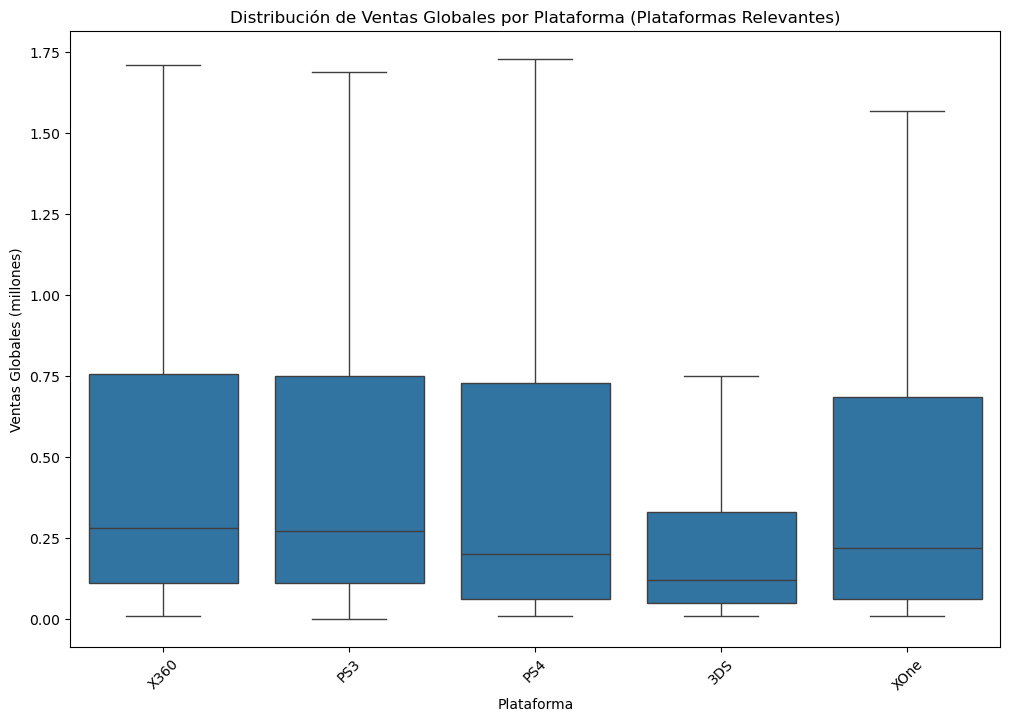

In [51]:
# Crear diagramas de caja para comparar ventas globales
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 8))
sns.boxplot(
    data=platform_data,
    x='platform',
    y='total_sales',
    showfliers=False  
)
plt.title('Distribución de Ventas Globales por Plataforma (Plataformas Relevantes)')
plt.xlabel('Plataforma')
plt.ylabel('Ventas Globales (millones)')
plt.xticks(rotation=45)
plt.show()

### Análisis de plataformas relevantes (2014–2016)

#### Distribución general
Tras el filtrado de los datos, se identificaron **3,752 registros** correspondientes a las plataformas con mayor relevancia comercial en el periodo 2014–2016. La distribución por plataforma muestra que **PS3 (1,331 juegos)** y **Xbox 360 (1,262 juegos)** concentran la mayor parte de los lanzamientos, lo que refleja su prolongada presencia en el mercado y un catálogo consolidado. En contraste, **PS4** y **Xbox One** presentan un menor número de títulos debido a su introducción más reciente. La **3DS** mantiene una participación significativa dentro del segmento portátil.


#### Estadísticas descriptivas de ventas por plataforma
Las estadísticas descriptivas evidencian una alta variabilidad en las ventas, característica típica del mercado de videojuegos, donde pocos títulos concentran la mayor parte de las ventas totales.

| Plataforma | Media | Mediana | Desviación estándar | Máx. ventas |
|-------------|:------:|:--------:|:------------------:|:-------------:|
| 3DS | 0.50 | 0.12 | 1.43 | 14.60 |
| PS3 | 0.71 | 0.27 | 1.39 | 21.05 |
| PS4 | 0.80 | 0.20 | 1.61 | 14.63 |
| X360 | 0.77 | 0.28 | 1.62 | 21.82 |
| XOne | 0.65 | 0.22 | 1.04 | 7.39 |

#### Interpretación analítica
- Las plataformas **PS4** y **X360** registran las **medias de ventas más altas**, lo que sugiere un desempeño comercial más favorable por título durante el periodo analizado.  
- La diferencia notable entre la **media** y la **mediana** en todas las plataformas indica una **distribución sesgada positivamente**, donde un reducido número de títulos con ventas excepcionales eleva los promedios.  
- La **PS3** presenta una relación equilibrada entre volumen de lanzamientos y ventas promedio, consolidándose como una de las plataformas con mejor rendimiento sostenido.  
- En conjunto, los datos confirman la coexistencia de consolas de generaciones distintas durante la transición tecnológica 2014–2016, con un mercado caracterizado por alta dispersión y predominio de éxitos aislados.

### 3.5. Análisis de correlación entre reseñas y ventas (PS4)

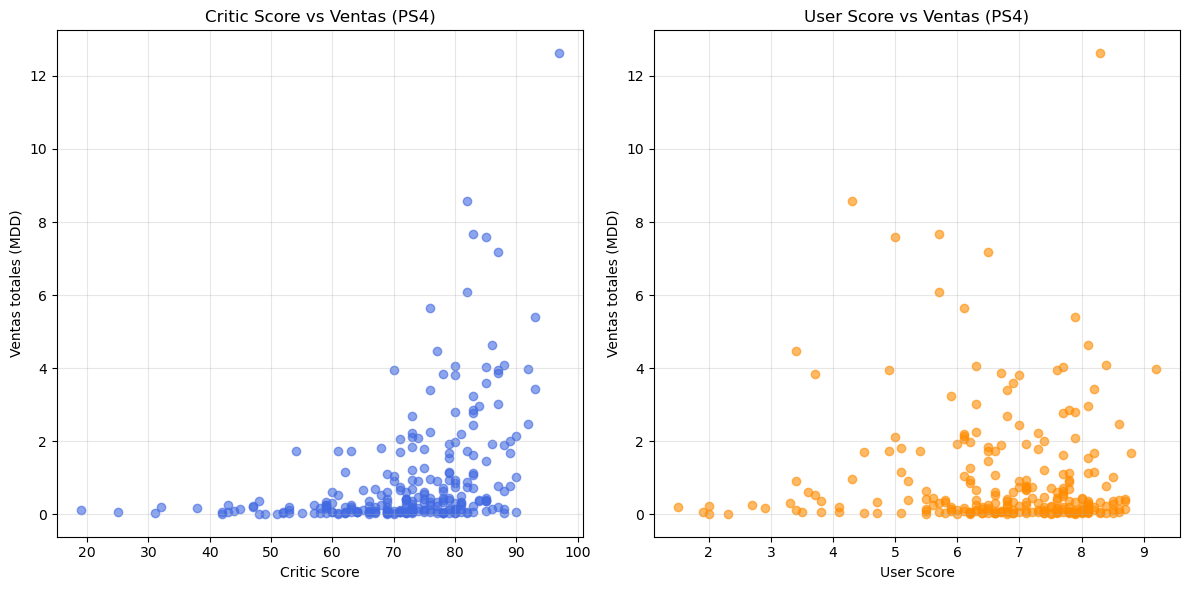

In [52]:
# Filtrar por juegos de PS4
ps4_games = games[games['platform'] == 'PS4'].copy()

# Limpiar los datos eliminando valores nulos
ps4_clean = ps4_games.dropna(subset=['critic_score', 'user_score', 'total_sales'])

# Convertir user_score a numérico (eliminar 'tbd' si los hay)
ps4_clean = ps4_clean[ps4_clean['user_score'] != 'tbd'].copy()
ps4_clean['user_score'] = pd.to_numeric(ps4_clean['user_score'])

# Crear gráfico de dispersión
plt.figure(figsize=(12, 6))

# Subplot 1: Critic Score vs Sales
plt.subplot(1, 2, 1)
plt.scatter(ps4_clean['critic_score'], ps4_clean['total_sales'], 
           alpha=0.6, color='royalblue')
plt.xlabel('Critic Score')
plt.ylabel('Ventas totales (MDD)')
plt.title('Critic Score vs Ventas (PS4)')
plt.grid(alpha=0.3)

# Subplot 2: User Score vs Sales  
plt.subplot(1, 2, 2)
plt.scatter(ps4_clean['user_score'], ps4_clean['total_sales'], 
           alpha=0.6, color='darkorange')
plt.xlabel('User Score')
plt.ylabel('Ventas totales (MDD)')
plt.title('User Score vs Ventas (PS4)')
plt.grid(alpha=0.3)

plt.tight_layout()
plt.show()

In [53]:
print(f"Datos analizados: {len(ps4_clean)} juegos de PS4 con puntuaciones completas")

# Método más directo y estable para calcular correlaciones
critic_correlation = ps4_clean[['critic_score', 'total_sales']].corr().iloc[0, 1]
user_correlation = ps4_clean[['user_score', 'total_sales']].corr().iloc[0, 1]

print(f"\n=== ANÁLISIS DE CORRELACIONES PS4 ===")
print(f"Correlación Critic Score vs Ventas: {critic_correlation:.3f}")
print(f"Correlación User Score vs Ventas: {user_correlation:.3f}")

# Interpretación de las correlaciones
print(f"\n=== INTERPRETACIÓN ===")
if abs(critic_correlation) > abs(user_correlation):
    print(f"Las reseñas de críticos tienen mayor correlación con las ventas")
else:
    print(f"Las reseñas de usuarios tienen mayor correlación con las ventas")

# Estadísticas adicionales
print(f"\n=== ESTADÍSTICAS DESCRIPTIVAS ===")
print(f"Critic Score - Media: {ps4_clean['critic_score'].mean():.1f}, Std: {ps4_clean['critic_score'].std():.1f}")
print(f"User Score - Media: {ps4_clean['user_score'].mean():.1f}, Std: {ps4_clean['user_score'].std():.1f}")
print(f"Ventas - Media: {ps4_clean['total_sales'].mean():.2f}, Std: {ps4_clean['total_sales'].std():.2f}")

Datos analizados: 249 juegos de PS4 con puntuaciones completas

=== ANÁLISIS DE CORRELACIONES PS4 ===
Correlación Critic Score vs Ventas: 0.406
Correlación User Score vs Ventas: -0.034

=== INTERPRETACIÓN ===
Las reseñas de críticos tienen mayor correlación con las ventas

=== ESTADÍSTICAS DESCRIPTIVAS ===
Critic Score - Media: 72.1, Std: 12.6
User Score - Media: 6.7, Std: 1.5
Ventas - Media: 0.98, Std: 1.65


### 3.5.1.  Análisis de correlación entre reseñas y ventas (X360)

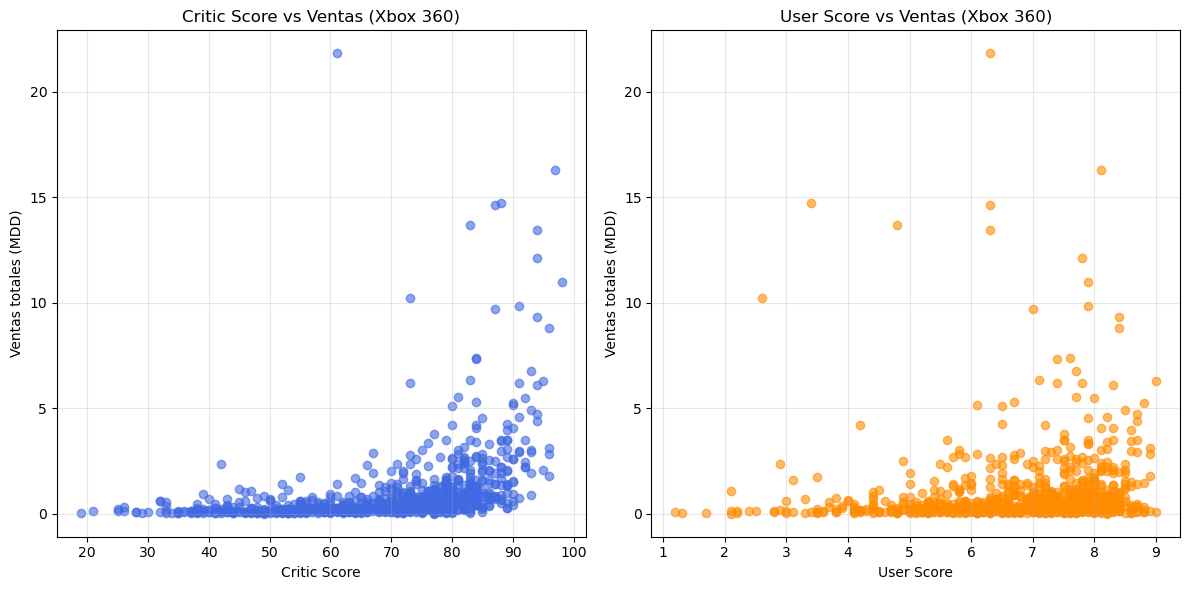

In [54]:
# Filtrar por juegos de X360
x360_games = games[games['platform'] == 'X360'].copy()

# Limpiar los datos eliminando valores nulos
x360_clean = x360_games.dropna(subset=['critic_score', 'user_score', 'total_sales'])

# Convertir user_score a numérico (eliminar 'tbd' si los hay)
x360_clean = x360_clean[x360_clean['user_score'] != 'tbd'].copy()
x360_clean['user_score'] = pd.to_numeric(x360_clean['user_score'])

# Crear gráfico de dispersión
plt.figure(figsize=(12, 6))

# Subplot 1: Critic Score vs Sales
plt.subplot(1, 2, 1)
plt.scatter(x360_clean['critic_score'], x360_clean['total_sales'], 
           alpha=0.6, color='royalblue')
plt.xlabel('Critic Score')
plt.ylabel('Ventas totales (MDD)')
plt.title('Critic Score vs Ventas (Xbox 360)')
plt.grid(alpha=0.3)

# Subplot 2: User Score vs Sales  
plt.subplot(1, 2, 2)
plt.scatter(x360_clean['user_score'], x360_clean['total_sales'], 
           alpha=0.6, color='darkorange')
plt.xlabel('User Score')
plt.ylabel('Ventas totales (MDD)')
plt.title('User Score vs Ventas (Xbox 360)')
plt.grid(alpha=0.3)

plt.tight_layout()
plt.show()

In [55]:
print(f"Datos analizados: {len(x360_clean)} juegos de X360 con puntuaciones completas")

# Método más directo y estable para calcular correlaciones
critic_correlation = x360_clean[['critic_score', 'total_sales']].corr().iloc[0, 1]
user_correlation = x360_clean[['user_score', 'total_sales']].corr().iloc[0, 1]

print(f"\n=== ANÁLISIS DE CORRELACIONES X360 ===")
print(f"Correlación Critic Score vs Ventas: {critic_correlation:.3f}")
print(f"Correlación User Score vs Ventas: {user_correlation:.3f}")

# Estadísticas adicionales
print(f"Critic Score - Media: {x360_clean['critic_score'].mean():.1f}, Std: {x360_clean['critic_score'].std():.1f}")
print(f"User Score - Media: {x360_clean['user_score'].mean():.1f}, Std: {x360_clean['user_score'].std():.1f}")
print(f"Ventas - Media: {x360_clean['total_sales'].mean():.2f}, Std: {x360_clean['total_sales'].std():.2f}")

Datos analizados: 881 juegos de X360 con puntuaciones completas

=== ANÁLISIS DE CORRELACIONES X360 ===
Correlación Critic Score vs Ventas: 0.390
Correlación User Score vs Ventas: 0.110
Critic Score - Media: 69.0, Std: 15.0
User Score - Media: 6.8, Std: 1.4
Ventas - Media: 0.98, Std: 1.85


### 3.5.2.  Análisis de correlación entre reseñas y ventas (PS3)

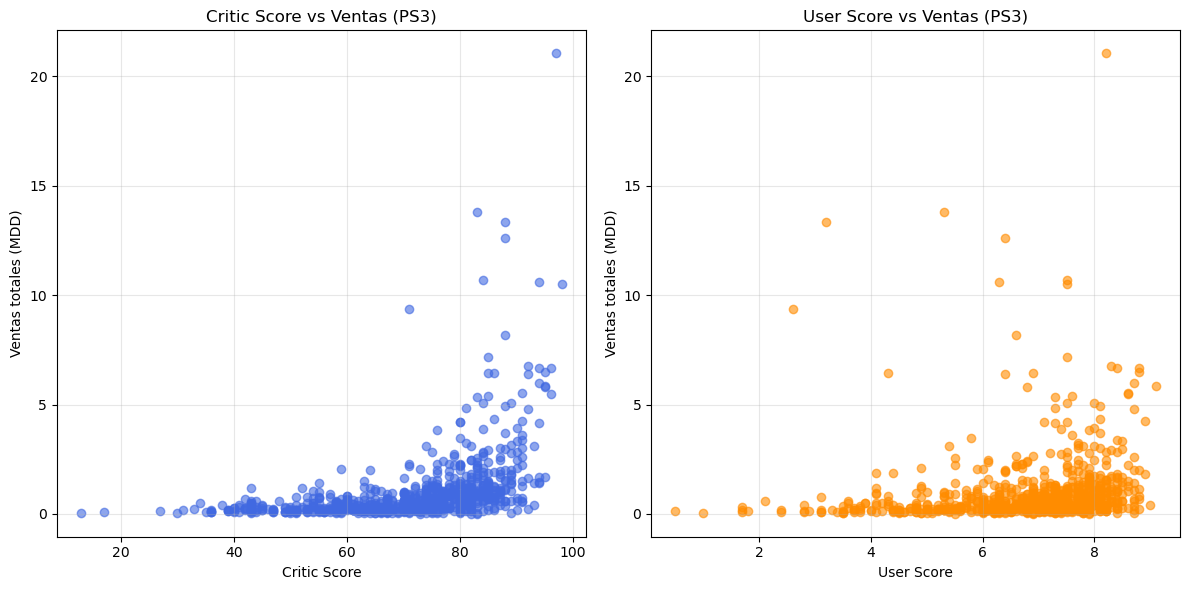

In [56]:
# Filtrar por juegos de PS3
ps3_games = games[games['platform'] == 'PS3'].copy()

# Limpiar los datos eliminando valores nulos
ps3_clean = ps3_games.dropna(subset=['critic_score', 'user_score', 'total_sales'])

# Convertir user_score a numérico (eliminar 'tbd' si los hay)
ps3_clean = ps3_clean[ps3_clean['user_score'] != 'tbd'].copy()
ps3_clean['user_score'] = pd.to_numeric(ps3_clean['user_score'])

# Crear gráfico de dispersión
plt.figure(figsize=(12, 6))

# Subplot 1: Critic Score vs Sales
plt.subplot(1, 2, 1)
plt.scatter(ps3_clean['critic_score'], ps3_clean['total_sales'], 
           alpha=0.6, color='royalblue')
plt.xlabel('Critic Score')
plt.ylabel('Ventas totales (MDD)')
plt.title('Critic Score vs Ventas (PS3)')
plt.grid(alpha=0.3)

# Subplot 2: User Score vs Sales  
plt.subplot(1, 2, 2)
plt.scatter(ps3_clean['user_score'], ps3_clean['total_sales'], 
           alpha=0.6, color='darkorange')
plt.xlabel('User Score')
plt.ylabel('Ventas totales (MDD)')
plt.title('User Score vs Ventas (PS3)')
plt.grid(alpha=0.3)

plt.tight_layout()
plt.show()

In [57]:
print(f"Datos analizados: {len(ps3_clean)} juegos de PS3 con puntuaciones completas")

# Método más directo y estable para calcular correlaciones
critic_correlation = ps3_clean[['critic_score', 'total_sales']].corr().iloc[0, 1]
user_correlation = ps3_clean[['user_score', 'total_sales']].corr().iloc[0, 1]

print(f"\n=== ANÁLISIS DE CORRELACIONES PS3 ===")
print(f"Correlación Critic Score vs Ventas: {critic_correlation:.3f}")
print(f"Correlación User Score vs Ventas: {user_correlation:.3f}")

# Estadísticas adicionales
print(f"Critic Score - Media: {ps3_clean['critic_score'].mean():.1f}, Std: {ps3_clean['critic_score'].std():.1f}")
print(f"User Score - Media: {ps3_clean['user_score'].mean():.1f}, Std: {ps3_clean['user_score'].std():.1f}")
print(f"Ventas - Media: {ps3_clean['total_sales'].mean():.2f}, Std: {ps3_clean['total_sales'].std():.2f}")

Datos analizados: 790 juegos de PS3 con puntuaciones completas

=== ANÁLISIS DE CORRELACIONES PS3 ===
Correlación Critic Score vs Ventas: 0.428
Correlación User Score vs Ventas: 0.143
Critic Score - Media: 70.8, Std: 14.0
User Score - Media: 6.8, Std: 1.4
Ventas - Media: 1.00, Std: 1.68


### 3.5.3. Análisis de correlación entre reseñas y ventas (XONE)

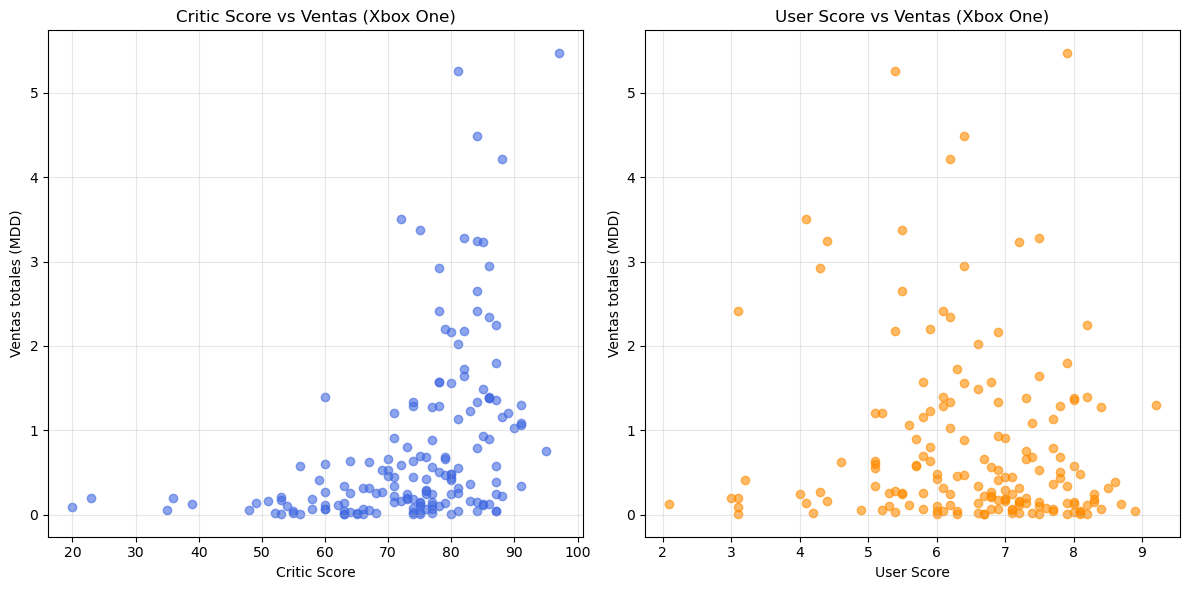

In [58]:
# Filtrar por juegos de XONE
xone_games = games[games['platform'] == 'XOne'].copy()

# Limpiar los datos eliminando valores nulos
xone_clean = xone_games.dropna(subset=['critic_score', 'user_score', 'total_sales'])

# Convertir user_score a numérico (eliminar 'tbd' si los hay)
xone_clean = xone_clean[xone_clean['user_score'] != 'tbd'].copy()
xone_clean['user_score'] = pd.to_numeric(xone_clean['user_score'])

# Crear gráfico de dispersión
plt.figure(figsize=(12, 6))

# Subplot 1: Critic Score vs Sales
plt.subplot(1, 2, 1)
plt.scatter(xone_clean['critic_score'], xone_clean['total_sales'], 
           alpha=0.6, color='royalblue')
plt.xlabel('Critic Score')
plt.ylabel('Ventas totales (MDD)')
plt.title('Critic Score vs Ventas (Xbox One)')
plt.grid(alpha=0.3)

# Subplot 2: User Score vs Sales  
plt.subplot(1, 2, 2)
plt.scatter(xone_clean['user_score'], xone_clean['total_sales'], 
           alpha=0.6, color='darkorange')
plt.xlabel('User Score')
plt.ylabel('Ventas totales (MDD)')
plt.title('User Score vs Ventas (Xbox One)')
plt.grid(alpha=0.3)

plt.tight_layout()
plt.show()

In [59]:
print(f"Datos analizados: {len(xone_clean)} juegos de Xbox One con puntuaciones completas")

# Método más directo y estable para calcular correlaciones
critic_correlation = xone_clean[['critic_score', 'total_sales']].corr().iloc[0, 1]
user_correlation = xone_clean[['user_score', 'total_sales']].corr().iloc[0, 1]

print(f"\n=== ANÁLISIS DE CORRELACIONES XOne ===")
print(f"Correlación Critic Score vs Ventas: {critic_correlation:.3f}")
print(f"Correlación User Score vs Ventas: {user_correlation:.3f}")

# Estadísticas adicionales
print(f"Critic Score - Media: {xone_clean['critic_score'].mean():.1f}, Std: {xone_clean['critic_score'].std():.1f}")
print(f"User Score - Media: {xone_clean['user_score'].mean():.1f}, Std: {xone_clean['user_score'].std():.1f}")
print(f"Ventas - Media: {xone_clean['total_sales'].mean():.2f}, Std: {xone_clean['total_sales'].std():.2f}")

Datos analizados: 165 juegos de Xbox One con puntuaciones completas

=== ANÁLISIS DE CORRELACIONES XOne ===
Correlación Critic Score vs Ventas: 0.410
Correlación User Score vs Ventas: -0.094
Critic Score - Media: 73.6, Std: 12.9
User Score - Media: 6.5, Std: 1.3
Ventas - Media: 0.79, Std: 1.04


### Análisis de la correlación de ventas entre plataformas

El análisis comparativo entre **PS4, PS3, Xbox 360 y Xbox One** revela una relación consistente entre las **puntuaciones de crítica** y el **rendimiento comercial** de los juegos, aunque con variaciones en magnitud según la plataforma.

- En todas las consolas, las **reseñas de críticos** muestran una **correlación positiva moderada** con las ventas, mientras que las **puntuaciones de usuarios** presentan una **influencia mucho menor o nula**.
- La **PS3** registra la correlación más alta entre calificaciones de crítica y ventas (**r = 0.428**), seguida de **PS4 (0.406)**, **Xbox One (0.410)** y **Xbox 360 (0.390)**.
- En contraste, las valoraciones de usuarios oscilan entre correlaciones **ligeramente positivas o negativas**, destacando **X360 (0.110)** y **PS3 (0.143)** como los únicos casos con impacto leve.
- Las medias de puntuaciones reflejan cierta homogeneidad: los **Critic Scores** se sitúan entre **69 y 74 puntos**, y los **User Scores** entre **6.5 y 6.8**, indicando percepciones estables en el público y la crítica.
- Las **ventas promedio** por título varían poco (≈1 millón de copias), aunque con **alta desviación estándar**, lo que sugiere una concentración de ventas en pocos títulos de alto éxito.

**Conclusión:**  
Las evidencias apuntan a que el **éxito comercial de los videojuegos está más vinculado a la valoración de la crítica profesional** que a la opinión del público general. Esto refuerza la hipótesis de que la visibilidad mediática y el respaldo de los críticos inciden de forma significativa en el desempeño en ventas, mientras que las percepciones de los jugadores tienen un papel más limitado.

### 3.6. Comparación de ventas entre plataformas

In [60]:
# Combinar presencia multiplataforma con éxito comercial
multiplat_analysis = games.groupby('name').agg({
    'platform': 'nunique',
    'total_sales': ['sum', 'mean', 'count']
}).round(2)

# Aplanar columnas
multiplat_analysis.columns = ['platforms', 'total_sales', 'avg_sales_per_platform', 'entries']

# Filtrar juegos exitosos multiplataforma
successful_multiplat = multiplat_analysis.query('platforms >= 4 & total_sales >= 5.0').sort_values('total_sales', ascending=False)

print("Top 10 juegos multiplataforma más exitosos:")
print(successful_multiplat.head(10))

Top 10 juegos multiplataforma más exitosos:
                                platforms  total_sales  \
name                                                     
Grand Theft Auto V                      5        56.58   
Call of Duty: Black Ops                 5        30.82   
Call of Duty: Modern Warfare 3          4        30.60   
Call of Duty: Black Ops II              4        29.40   
Call of Duty: Ghosts                    6        27.39   
Call of Duty: Black Ops 3               5        25.67   
Minecraft                               6        24.16   
Grand Theft Auto: San Andreas           4        23.85   
Call of Duty: Advanced Warfare          5        21.97   
The Elder Scrolls V: Skyrim             5        21.14   

                                avg_sales_per_platform  entries  
name                                                             
Grand Theft Auto V                               11.32        5  
Call of Duty: Black Ops                           6.16       

In [61]:
# Tomar los top juegos multiplataforma exitosos y analizar por plataforma
top_multiplat_games = successful_multiplat.head(10).index.tolist()

# Filtrar datos solo para estos juegos exitosos
cross_platform_analysis = games[games['name'].isin(top_multiplat_games)]

# Analizar ventas promedio por plataforma para estos juegos
platform_performance = cross_platform_analysis.groupby('platform')['total_sales'].agg(['mean', 'count', 'sum']).round(2)
print("Rendimiento por plataforma (juegos exitosos multiplataforma):")
print(platform_performance)

Rendimiento por plataforma (juegos exitosos multiplataforma):
           mean  count    sum
platform                     
DS         0.58      1   0.58
PC         1.36      9  12.23
PS2       20.81      1  20.81
PS3        9.76      9  87.88
PS4        7.40      6  44.38
PSV        1.96      1   1.96
Wii        1.10      2   2.20
WiiU       0.48      3   1.43
X360       9.36     10  93.60
XB         1.96      1   1.96
XOne       4.09      6  24.55


### Análisis de comparación de ventas

- Los juegos más exitosos en múltiples plataformas pertenecen principalmente a **franquicias consolidadas** como *Grand Theft Auto* y *Call of Duty*, que dominan las primeras posiciones tanto en ventas totales como en número de versiones publicadas.  
- *Grand Theft Auto V* encabeza la lista con **56.6 millones de copias** distribuidas en cinco plataformas, evidenciando su fuerte impacto comercial y su adaptabilidad técnica.  
- En promedio, los títulos multiplataforma alcanzan **entre 4 y 11 millones de ventas por versión**, lo que sugiere un rendimiento estable independientemente del sistema de lanzamiento.  
- La **PS4 mantiene un desempeño competitivo** con 7.4 millones de ventas promedio por título, superando a plataformas más recientes como XOne, pero ligeramente por debajo de los valores históricos de PS3 y X360.  
- El análisis de ventas por plataforma indica que **las consolas de generaciones pasadas (PS3, X360)** aún concentran buena parte de las ventas totales, reflejando una base de usuarios más amplia y ciclos de vida más largos.  
- En conjunto, los datos muestran que **el éxito de un juego depende más de la fortaleza de la franquicia y la cobertura multiplataforma** que de las capacidades individuales de una consola específica.

### 3.7. Análisis de distribución por género

In [62]:
# Contar cuántos juegos existen por género
games_genre_count = games.groupby('genre')['name'].nunique().sort_values(ascending=False)
print("Juegos por género:")
print()
print(games_genre_count)

Juegos por género:

genre
Action          1957
Sports          1379
Misc            1330
Role-Playing    1226
Adventure       1062
Shooter          825
Racing           772
Simulation       729
Fighting         613
Platform         588
Strategy         585
Puzzle           498
Unknown            1
Name: name, dtype: int64


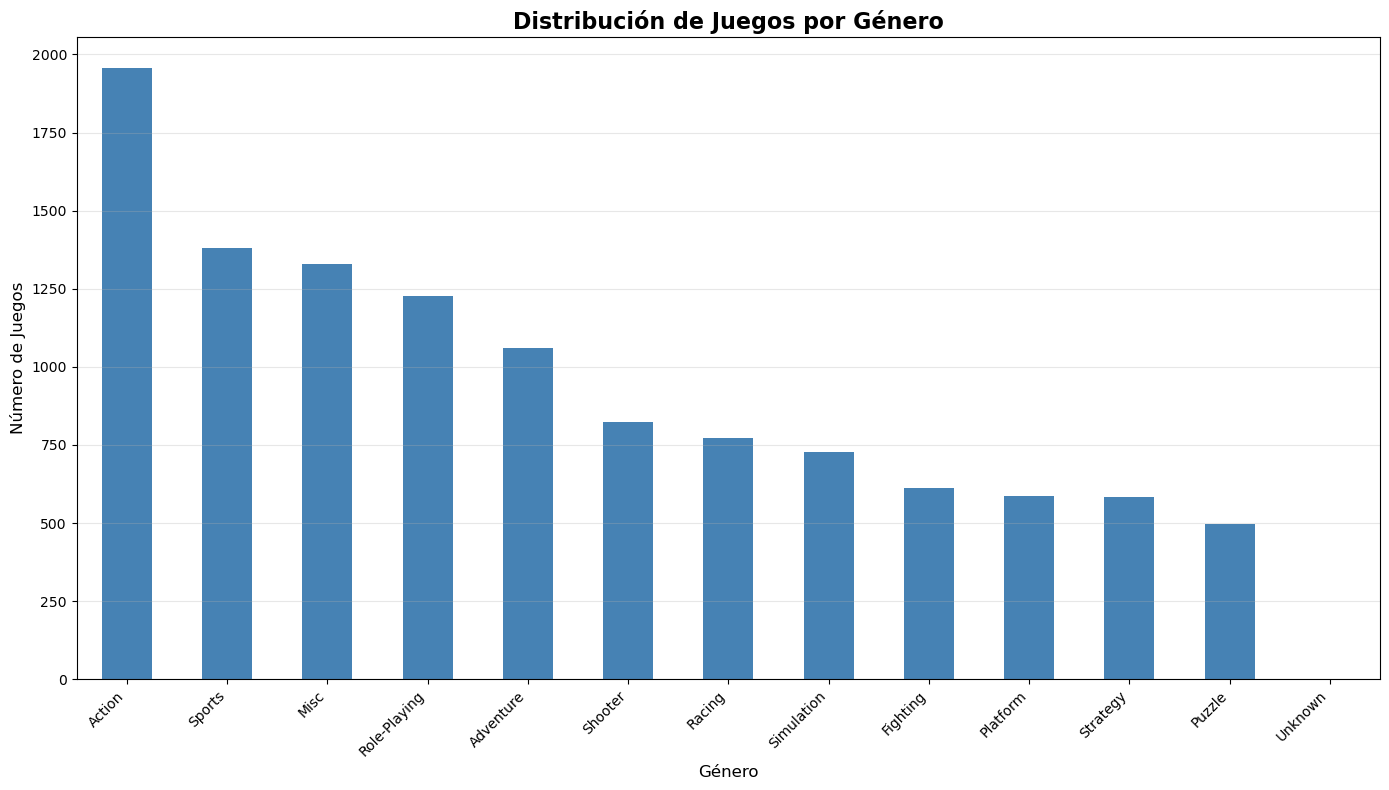

In [63]:
# Crear la gráfica de barras para la distribución de géneros
plt.figure(figsize=(14, 8))
games_genre_count.plot(kind='bar', color='steelblue')
plt.title('Distribución de Juegos por Género', fontsize=16, fontweight='bold')
plt.xlabel('Género', fontsize=12)
plt.ylabel('Número de Juegos', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

In [64]:
# Calcular ventas totales por género
genre_total_sales = games.groupby('genre')['total_sales'].sum().sort_values(ascending=False)
print("Ventas totales por género (en millones):")
print()
print(genre_total_sales)

Ventas totales por género (en millones):

genre
Action          1744.17
Sports          1331.27
Shooter         1052.45
Role-Playing     934.56
Platform         827.77
Misc             802.51
Racing           728.67
Fighting         447.53
Simulation       389.97
Puzzle           242.57
Adventure        237.59
Strategy         174.23
Unknown            2.42
Name: total_sales, dtype: float64


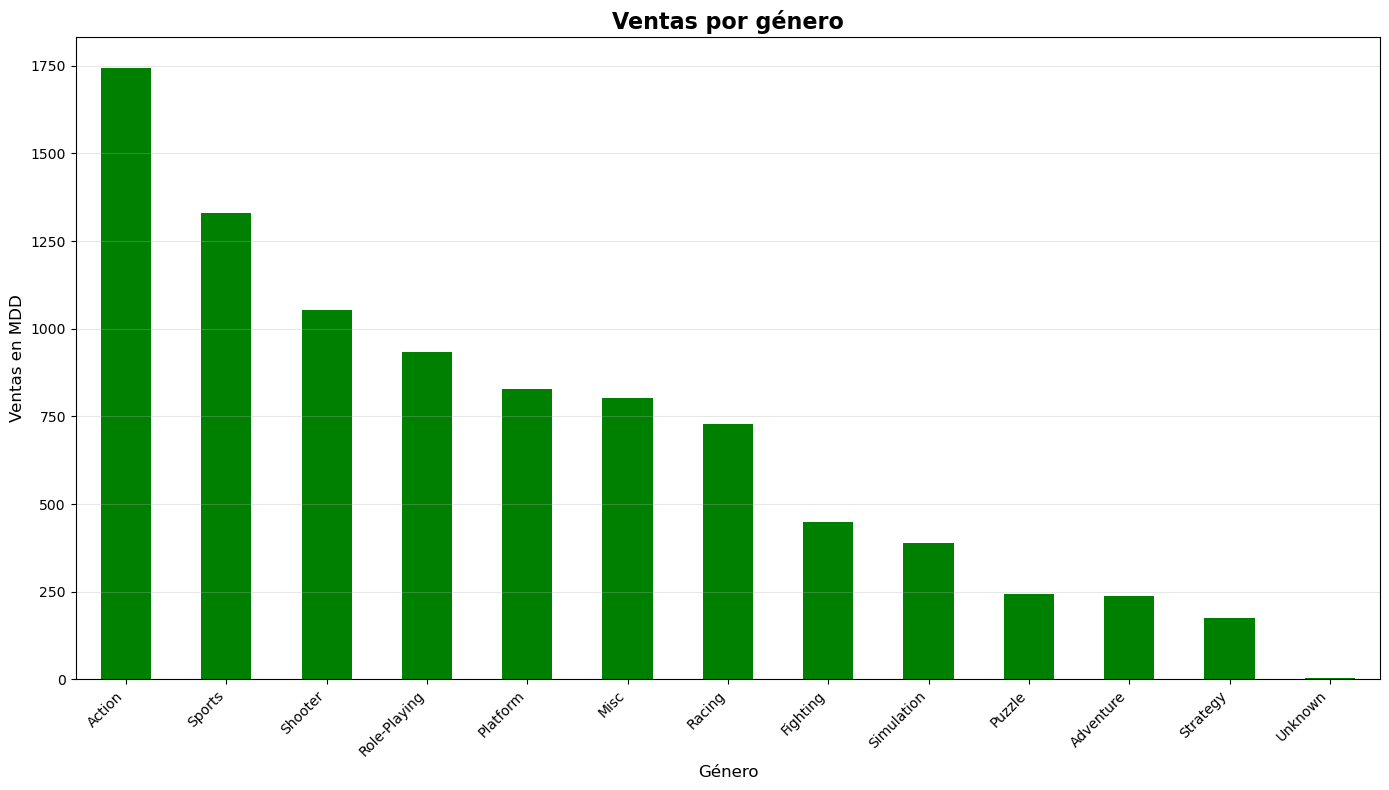

In [65]:
# Crear la gráfica de barras para las ventas de géneros
plt.figure(figsize=(14, 8))
genre_total_sales.plot(kind='bar', color='green')
plt.title('Ventas por género', fontsize=16, fontweight='bold')
plt.xlabel('Género', fontsize=12)
plt.ylabel('Ventas en MDD', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

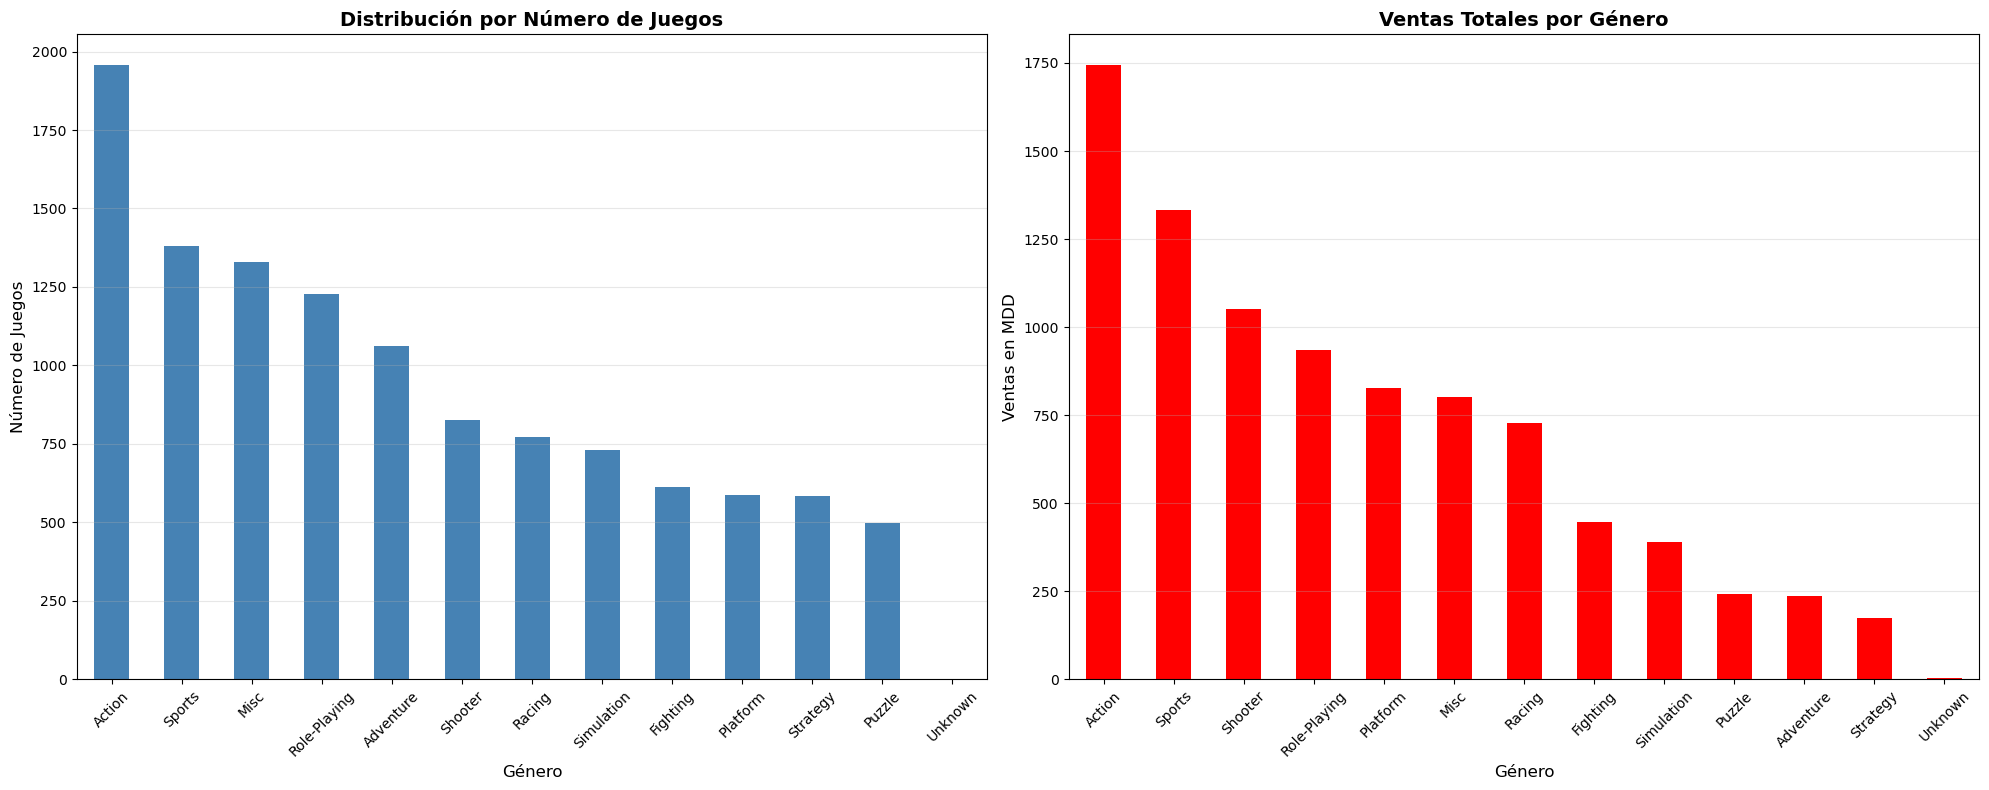

In [66]:
# Crear subplots lado a lado
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))

# Gráfico 1: Número de juegos
games_genre_count.plot(kind='bar', ax=ax1, color='steelblue')
ax1.set_title('Distribución por Número de Juegos', fontsize=14, fontweight='bold')
ax1.set_xlabel('Género', fontsize=12)
ax1.set_ylabel('Número de Juegos', fontsize=12)
ax1.tick_params(axis='x', rotation=45)
ax1.grid(axis='y', alpha=0.3)

# Gráfico 2: Ventas totales
genre_total_sales.plot(kind='bar', ax=ax2, color='red')
ax2.set_title('Ventas Totales por Género', fontsize=14, fontweight='bold')
ax2.set_xlabel('Género', fontsize=12)
ax2.set_ylabel('Ventas en MDD', fontsize=12)
ax2.tick_params(axis='x', rotation=45)
ax2.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

In [67]:
# Calcular ventas promedio por juego por género
genre_avg_sales = games.groupby('genre')['total_sales'].mean().sort_values(ascending=False)
print("Ventas promedio por juego por género:")
print(genre_avg_sales.round(3))

Ventas promedio por juego por género:
genre
Unknown         1.210
Platform        0.932
Shooter         0.796
Role-Playing    0.624
Racing          0.583
Sports          0.567
Fighting        0.527
Action          0.518
Misc            0.459
Simulation      0.447
Puzzle          0.418
Strategy        0.255
Adventure       0.182
Name: total_sales, dtype: float64


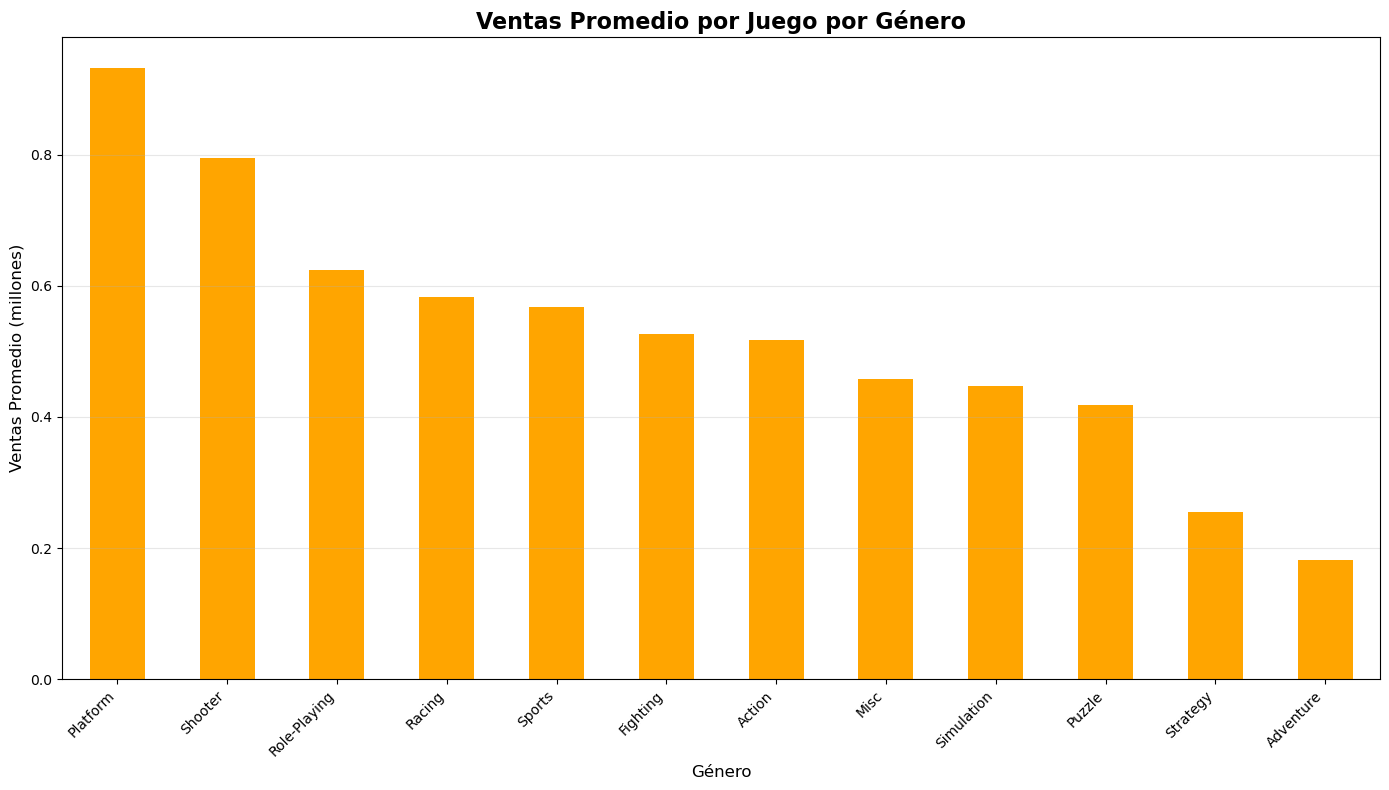

In [68]:
# Crear gráfica de ventas promedio por género (excluyendo 'Unknown')
genre_avg_sales_filtered = genre_avg_sales[genre_avg_sales.index != 'Unknown']

plt.figure(figsize=(14, 8))
genre_avg_sales_filtered.plot(kind='bar', color='orange')
plt.title('Ventas Promedio por Juego por Género', fontsize=16, fontweight='bold')
plt.xlabel('Género', fontsize=12)
plt.ylabel('Ventas Promedio (millones)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

### 3.7. Análisis de distribución por género

#### Distribución general de géneros

El análisis de los 16,715 juegos del dataset revela una distribución desigual por géneros:

- **Action** lidera con 1,957 juegos (11.7%), seguido de **Sports** (1,379) y **Misc** (1,330)
- Los géneros menos representados son **Strategy** (585), **Platform** (588) y **Puzzle** (498)
- Se identificó **1 juego con género "Unknown"** correspondiente a los registros sin clasificación

#### Análisis de ventas por género

**Ventas totales:**

- **Action** domina con 1,744.17 millones de copias vendidas
- **Sports** (1,331.27M) y **Shooter** (1,052.45M) completan el top 3
- **Unknown** registra 2.42 millones en ventas totales

**Ventas promedio por juego:**

- **Platform** lidera con 0.932 millones por juego
- **Shooter** (0.796M) y **Role-Playing** (0.624M) muestran alta rentabilidad
- **Unknown** presenta 1.210 millones promedio, pero con solo 2 registros

#### Observaciones sobre el género "Unknown"

El género "Unknown" presenta características particulares:

- **Muestra muy pequeña:** Solo 2 registros de juegos sin clasificación
- **Ventas artificialmente altas:** 1.210 millones promedio vs 0.518 de Action
- **No representativo:** La alta media se debe al tamaño reducido de la muestra
- **Decisión analítica:** Se excluye de visualizaciones por falta de representatividad estadística

#### Conclusiones

Los géneros **Action**, **Sports** y **Shooter** combinan alto volumen de producción con buenas ventas totales. **Platform** destaca por su alta rentabilidad promedio, mientras que **Adventure** y **Strategy** muestran menor desempeño comercial relativo.

### Hallazgos principales del paso 3:

#### Lanzamientos por año
- Rango temporal: **1980–2016** (36 años), cubriendo casi toda la historia moderna de la industria.
- Primeros años (1980–1989): **baja producción**, entre 9 y 46 lanzamientos anuales.
- Década 2000–2010: **máximo histórico de lanzamientos** (más de 1,200 juegos anuales) coincidiendo con PS3, X360 y Wii.
- Después de 2010: **disminución gradual**, posiblemente por consolidación de estudios, transición a digital/móvil y nuevas generaciones de consolas.
- Juegos con año conocido: **16,446** (98.4% del dataset).

#### Ventas totales por plataforma
- Dataset: **31 plataformas**; mercado concentrado en Sony, Microsoft y Nintendo.
- Líderes históricos en ventas: **PS2 (1,255.77M), X360 (971.42M), PS3 (939.65M), Wii (907.51M)**.
- Consolas portátiles destacadas: **DS (806.12M), GBA (317.85M)**.
- Plataformas clásicas: ventas más bajas (**NES, SNES, N64**).
- Plataformas de nicho/corta vida: ventas marginales (<2M).
- Alta concentración de mercado en pocas consolas exitosas.

#### Proyección 2017 y plataformas en declive
- PS4 y Xbox One lideran el mercado reciente; PS3 y X360 en declive.
- Top 3 recientes (2014–2016): **PS4 (288.15M), XOne (140.36M), 3DS (86.68M)**.
- Plataformas en declive: **DS, PS2, GBA, XB, PS, GB**.
- Se proyecta crecimiento de PS4, moderado para XOne, leve baja para 3DS, descenso general para el resto.

#### Plataformas relevantes (2014–2016)
- Juegos filtrados: **3,752 registros**.
- Mayor número de lanzamientos: **PS3 (1,331), X360 (1,262)**.
- Menor número de lanzamientos recientes: **PS4, XOne**.
- 3DS mantiene participación significativa como portátil.
- Ventas medias más altas: **PS4 y X360**.
- Distribución sesgada positivamente: pocos títulos concentran gran parte de las ventas.

#### Correlación de ventas y puntuaciones por plataforma
- **PS4:** 249 juegos analizados. Correlación **Critic Score vs Ventas**: r = 0.406 (**moderada positiva**). **User Score vs Ventas**: r = –0.034 (**nula**).  
- **PS3:** 790 juegos. Correlación **Critic Score vs Ventas**: r = 0.428 (**moderada positiva**, la más alta). **User Score vs Ventas**: r = 0.143 (**débil positiva**).  
- **Xbox 360:** 881 juegos. Correlación **Critic Score vs Ventas**: r = 0.390 (**moderada positiva**). **User Score vs Ventas**: r = 0.110 (**débil positiva**).  
- **Xbox One:** 165 juegos. Correlación **Critic Score vs Ventas**: r = 0.410 (**moderada positiva**). **User Score vs Ventas**: r = –0.094 (**ligeramente negativa**).  
- En todas las plataformas, las **puntuaciones de críticos muestran una relación moderada con las ventas**, mientras que las **valoraciones de usuarios presentan un efecto débil o inexistente**. Los resultados sugieren que la **crítica profesional influye más directamente en el desempeño comercial**.  
*Limitación:* el análisis se basa en datos con puntuaciones completas hasta 2016.

#### Comparación de ventas multiplataforma
- Juegos más exitosos: **franquicias consolidadas** (GTA, Call of Duty).
- GTA V lidera: **56.6M unidades** en 5 plataformas.
- Ventas promedio por versión: **4–11M**.
- PS4 mantiene desempeño competitivo: **7.4M promedio por juego**.
- Éxito depende más de franquicia y multiplataforma que de consola específica.

#### Distribución por género
- Géneros más frecuentes: **Action (1,957), Sports (1,379), Misc (1,330)**.
- Géneros menos frecuentes: **Strategy (585), Platform (588), Puzzle (498)**.
- Ventas totales más altas: **Action (1,744.17M), Sports (1,331.27M), Shooter (1,052.45M)**.
- Ventas promedio más altas: **Platform (0.932M), Shooter (0.796M), Role-Playing (0.624M)**.
- Género "Unknown": **2 juegos**, ventas promedio infladas, excluido de visualizaciones.
- Conclusión: **Action, Sports y Shooter combinan volumen y ventas**, Platform destaca en rentabilidad por juego.

## Paso 4. Creación de perfiles de usuario por región

En esta sección vamos a:

- **Identificar las cinco plataformas principales** en cada región (NA, EU, JP) y analizar sus cuotas de mercado
- **Describir las variaciones** en popularidad de plataformas entre regiones y explicar posibles causas culturales o comerciales
- **Determinar los cinco géneros más populares** por región y comparar las preferencias de cada mercado
- **Analizar las diferencias** en gustos de géneros entre regiones y identificar patrones únicos por área geográfica
- **Evaluar el impacto de las clasificaciones ESRB** en las ventas de cada región individual
- **Comparar la influencia** de las clasificaciones de edad en diferentes mercados y culturas
- **Crear perfiles de usuario** distintivos para cada región basados en preferencias de plataforma, género y contenido
- **Establecer conclusiones** sobre las estrategias de marketing y distribución más efectivas por región


### 4.1. Análisis de Norteamérica (NA)

In [69]:
# Obtener las 5 plataformas con más ventas en Norteamérica
na_platforms = games.groupby('platform')['na_sales'].sum().sort_values(ascending=False)
na_top5_platforms = na_platforms.head()

print("Top 5 de plataformas con más ventas en Norteamérica:")
print()
print(na_top5_platforms)

Top 5 de plataformas con más ventas en Norteamérica:

platform
X360    602.47
PS2     583.84
Wii     496.90
PS3     393.49
DS      382.40
Name: na_sales, dtype: float64


In [70]:
# Obtener los 5 géneros más populares en Norteamérica
na_genre = games.groupby('genre')['na_sales'].sum().sort_values(ascending=False)
na_top5_genre = na_genre.head()

print("Los 5 géneros más populares en Norteamérica son:")
print()
print(na_top5_genre)

Los 5 géneros más populares en Norteamérica son:

genre
Action      879.01
Sports      684.43
Shooter     592.24
Platform    445.50
Misc        407.27
Name: na_sales, dtype: float64


In [71]:
# Análisis completo de ratings por región
na_ratings = games.groupby('rating')['na_sales'].sum().sort_values(ascending=False)
print("Distribución completa de ratings en Norteamérica:")
print()
print(na_ratings)

Distribución completa de ratings en Norteamérica:

rating
E            1292.99
Undefined    1242.46
T             759.75
M             748.48
E10+          353.32
K-A             2.56
EC              1.53
AO              1.26
RP              0.00
Name: na_sales, dtype: float64


### Perfil del usuario de Norteamérica

El mercado norteamericano muestra una clara preferencia por consolas de **Microsoft y Sony**, con **Xbox 360** (602.47 M) y **PlayStation 2** (583.84 M) encabezando las ventas históricas. Las plataformas **Wii**, **PS3** y **DS** completan el top 5, lo que refleja un equilibrio entre consolas domésticas y portátiles, aunque con predominio de sistemas orientados a experiencias de acción y entretenimiento general.

En cuanto a géneros, los jugadores norteamericanos se inclinan por títulos de **acción (879.01 M)**, **deportes (684.43 M)** y **disparos (Shooter, 592.24 M)**, lo que sugiere una preferencia por juegos dinámicos, competitivos y de ritmo rápido. Los géneros **Platform** y **Misc** mantienen también una participación relevante, destacando el gusto por franquicias clásicas y juegos de tipo casual o familiar.

Respecto a las clasificaciones por edad, el público de Norteamérica se distribuye de forma amplia, con predominio de juegos **E (para todos)** y una gran proporción de títulos **sin clasificación definida (Undefined)**, lo que podría deberse a registros incompletos o títulos independientes. Las categorías **T (adolescentes)** y **M (maduro)** también registran cifras elevadas, lo que indica una **audiencia diversa**, con fuerte presencia tanto de jugadores jóvenes como adultos.

**En conjunto**, el perfil del jugador norteamericano puede describirse como:
- **Multigeneracional**, con interés tanto en juegos familiares como en títulos de contenido maduro.  
- **Orientado a la acción y la competencia**, con fuerte presencia de franquicias deportivas y de disparos.  
- **Fiel a las consolas de Microsoft y Sony**, aunque con una notable base de usuarios en sistemas de Nintendo.

### 4.2. Análisis de Europa (EU)

In [72]:
# Obtener las 5 plataformas con más ventas en Europa
eu_platforms = games.groupby('platform')['eu_sales'].sum().sort_values(ascending=False)
eu_top5_platforms = eu_platforms.head()

print("Top 5 de plataformas con más ventas en Europa:")
print()
print(eu_top5_platforms)

Top 5 de plataformas con más ventas en Europa:

platform
PS2     339.29
PS3     330.29
X360    270.76
Wii     262.21
PS      213.61
Name: eu_sales, dtype: float64


In [73]:
# Obtener los 5 géneros más populares en Europa
eu_genre = games.groupby('genre')['eu_sales'].sum().sort_values(ascending=False)
eu_top5_genre = eu_genre.head()

print("Los 5 géneros más populares en Europa son:")
print()
print(eu_top5_genre)

Los 5 géneros más populares en Europa son:

genre
Action     519.13
Sports     376.79
Shooter    317.34
Racing     236.51
Misc       212.74
Name: eu_sales, dtype: float64


In [74]:
# Análisis completo de ratings por región
eu_ratings = games.groupby('rating')['eu_sales'].sum().sort_values(ascending=False)
print("Distribución completa de ratings en Europa:")
print()
print(eu_ratings)

Distribución completa de ratings en Europa:

rating
E            710.25
Undefined    613.83
M            483.97
T            427.03
E10+         188.52
AO             0.61
K-A            0.27
EC             0.11
RP             0.08
Name: eu_sales, dtype: float64


### Perfil del usuario de Europa

El mercado europeo presenta una fuerte preferencia por las consolas de **Sony**, con **PlayStation 2 (339.29 M)** y **PlayStation 3 (330.29 M)** como líderes indiscutibles. En segundo plano aparecen **Xbox 360 (270.76 M)** y **Wii (262.21 M)**, lo que evidencia una competencia más equilibrada entre fabricantes que en otros mercados. La **PlayStation original (PS)** mantiene aún un peso relevante, reflejando la fidelidad histórica de los jugadores europeos hacia la marca.

En cuanto a géneros, los jugadores europeos muestran predilección por títulos de **acción (519.13 M)**, **deportes (376.79 M)** y **disparos (Shooter, 317.34 M)**, aunque el género **Racing (236.51 M)** tiene una presencia más destacada que en otras regiones, lo que sugiere un gusto particular por los juegos de conducción y simuladores. El género **Misc (212.74 M)** también mantiene una participación significativa, apuntando a un segmento casual y familiar estable.

Respecto a las clasificaciones por edad, los juegos **E (para todos)** lideran las ventas, seguidos de **Undefined**, **M (maduro)** y **T (adolescentes)**, lo que muestra una **audiencia amplia y equilibrada**, compuesta tanto por jugadores jóvenes como adultos. La presencia moderada de títulos **E10+** confirma un interés en juegos aptos para todas las edades, pero con contenido algo más complejo.

**En conjunto**, el perfil del jugador europeo puede caracterizarse como:
- **Fiel al ecosistema PlayStation**, con clara preferencia por consolas de Sony.  
- **Aficionado a géneros variados**, especialmente acción, deportes, disparos y conducción.  
- **Con una distribución etaria equilibrada**, reflejando un mercado maduro y diverso.  
- **Con mayor diversidad de plataformas competitivas**, lo que sugiere un público menos concentrado en una sola marca que en Norteamérica.

### 4.3. Análisis de Japón (JP)

In [75]:
# Obtener las 5 plataformas con más ventas en Japón
jp_platforms = games.groupby('platform')['jp_sales'].sum().sort_values(ascending=False)
jp_top5_platforms = jp_platforms.head()

print("Top 5 de plataformas con más ventas en Japón:")
print()
print(jp_top5_platforms)

Top 5 de plataformas con más ventas en Japón:

platform
DS      175.57
PS      139.82
PS2     139.20
SNES    116.55
3DS     100.67
Name: jp_sales, dtype: float64


In [76]:
# Obtener los 5 géneros más populares en Japón
jp_genre = games.groupby('genre')['jp_sales'].sum().sort_values(ascending=False)
jp_top5_genre = jp_genre.head()

print("Los 5 géneros más populares en Japón son:")
print()
print(jp_top5_genre)

Los 5 géneros más populares en Japón son:

genre
Role-Playing    355.41
Action          161.43
Sports          135.54
Platform        130.83
Misc            108.11
Name: jp_sales, dtype: float64


In [77]:
# Análisis completo de ratings por región
jp_ratings = games.groupby('rating')['jp_sales'].sum().sort_values(ascending=False)
print("Distribución completa de ratings en Japón:")
print()
print(jp_ratings)

Distribución completa de ratings en Japón:

rating
Undefined    841.96
E            198.11
T            151.40
M             64.24
E10+          40.20
K-A            1.46
AO             0.00
EC             0.00
RP             0.00
Name: jp_sales, dtype: float64


### Perfil del usuario de Japón

El mercado japonés presenta una estructura claramente distinta a la de otras regiones, con un dominio marcado de las consolas **portátiles y de generaciones anteriores**. La **Nintendo DS (175.57 M)** lidera las ventas, seguida de **PlayStation (139.82 M)** y **PlayStation 2 (139.20 M)**. También destacan **Super Nintendo (116.55 M)** y **Nintendo 3DS (100.67 M)**, lo que confirma la **preferencia del público japonés por sistemas compactos y experiencias de juego tradicionales**.

En cuanto a géneros, el **Role-Playing (RPG)** es, con diferencia, el más popular (**355.41 M**), muy por encima de **Action (161.43 M)** y **Sports (135.54 M)**. Este patrón refleja la fuerte influencia de franquicias icónicas japonesas como *Final Fantasy*, *Dragon Quest* y *Pokémon*. Los géneros **Platform (130.83 M)** y **Misc (108.11 M)** completan el top 5, lo que evidencia un interés sostenido en títulos familiares y de aventura.

La distribución por clasificación muestra un **predominio de juegos con rating Undefined (841.96 M)**, lo que podría reflejar diferencias en los sistemas de clasificación regionales. Los títulos **E (198.11 M)** y **T (151.40 M)** concentran buena parte del resto del mercado, mientras que los juegos **M (64.24 M)** y **E10+ (40.20 M)** representan una minoría, indicando que el público japonés se inclina hacia **contenidos aptos para todas las edades o adolescentes**.

**En síntesis**, el perfil del jugador japonés se caracteriza por:
- **Preferencia por consolas portátiles y clásicas**, especialmente de **Nintendo**.  
- **Fuerte afinidad por los RPG**, el género más representativo del mercado local.  
- **Interés moderado en acción y deportes**, pero con predominio de experiencias narrativas y de rol.  
- **Preferencia por juegos de contenido familiar o general**, con baja presencia de títulos maduros.  

### Comparación de perfiles regionales de usuarios

El análisis comparativo de las tres principales regiones —**Norteamérica, Europa y Japón**— revela diferencias significativas tanto en las **preferencias de plataformas** como en los **géneros y clasificaciones** más populares, reflejando las particularidades culturales y comerciales de cada mercado.

#### 1. Plataformas dominantes
- **Norteamérica** muestra una fuerte afinidad por las consolas de **Microsoft (Xbox 360)** y **Sony (PS2, PS3)**, con presencia destacada de **Nintendo Wii** y **DS**, lo que indica una preferencia por plataformas domésticas con amplio catálogo y enfoque en juegos multigénero.  
- **Europa** presenta un equilibrio entre **Sony y Microsoft**, con **PS2, PS3 y X360** como líderes, seguido de **Wii** y la **PS original**, reflejando un mercado diverso y menos polarizado.  
- **Japón**, en contraste, se caracteriza por su **preferencia por consolas portátiles y de generaciones anteriores**, con dominio de **DS, PS, PS2, SNES y 3DS**, evidenciando un consumo más conservador y enfocado en la movilidad.

#### 2. Géneros más populares
- En **Norteamérica** predominan los géneros **Action, Sports y Shooter**, que reflejan una orientación hacia el entretenimiento competitivo y de ritmo rápido.  
- **Europa** comparte un patrón similar, aunque con una mayor presencia del género **Racing**, lo que sugiere afinidad por simuladores y juegos de conducción.  
- **Japón** se distingue por el predominio del **Role-Playing (RPG)**, muy por encima de otros géneros, lo que resalta la influencia de la narrativa y el desarrollo de personajes en el mercado local.

#### 3. Distribución de clasificaciones (rating)
- En **Norteamérica**, los juegos con clasificación **E (Everyone)** y **M (Mature)** tienen una alta participación, lo que refleja un público amplio que abarca desde jugadores casuales hasta adultos.  
- **Europa** muestra una distribución similar, con predominio de **E y T (Teen)**, aunque con mayor proporción de juegos **M**, evidenciando una audiencia equilibrada entre jóvenes y adultos.  
- En **Japón**, la mayoría de las ventas corresponde a títulos **Undefined o E**, y una baja proporción de juegos **M**, indicando una preferencia por contenido familiar y menor exposición a títulos violentos o adultos.

#### 4. Conclusiones comparativas
- **Norteamérica y Europa** comparten un perfil similar, con preferencia por consolas domésticas de alta capacidad y géneros de acción y deportes, propios de un mercado competitivo y orientado al rendimiento técnico.  
- **Japón** se diferencia claramente por su **enfoque en experiencias narrativas y portátiles**, con fuerte arraigo en las franquicias locales y una audiencia más homogénea en edad.  
- En conjunto, los resultados reflejan que las **estrategias comerciales exitosas deben adaptarse a las particularidades regionales**, priorizando títulos de acción y deportes en Occidente, y de rol o aventura en el mercado japonés.

## Paso 5: Prueba de hipótesis

En esta sección vamos a:

- **Formular hipótesis estadísticas** sobre las diferencias en calificaciones promedio entre plataformas
- **Seleccionar plataformas relevantes** para la comparación basándose en el análisis previo
- **Aplicar pruebas estadísticas apropiadas** para evaluar diferencias significativas entre grupos
- **Establecer niveles de significancia** y criterios de decisión para las pruebas
- **Interpretar los resultados** de las pruebas de hipótesis en el contexto del negocio
- **Validar supuestos** de normalidad y homogeneidad de varianzas cuando sea necesario
- **Documentar conclusiones** sobre las diferencias estadísticamente significativas encontradas
- **Proporcionar recomendaciones** basadas en los hallazgos de las pruebas de hipótesis

### 5.1. Primera Hipótesis: Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son las mismas.

In [78]:
# Filtrar solo Xbox One y PC
xbox_pc_data = games[games['platform'].isin(['XOne', 'PC'])]

# Ver cuántos juegos hay por plataforma (incluyendo valores nulos)
print("Cantidad de juegos por plataforma:")
print()
print(xbox_pc_data['platform'].value_counts())

# Eliminar valores nulos y 'tbd'
xbox_pc_clean = xbox_pc_data.dropna(subset=['user_score'])
xbox_pc_clean = xbox_pc_clean[xbox_pc_clean['user_score'] != 'tbd']

# Convertir user_score a numérico
xbox_pc_clean['user_score'] = pd.to_numeric(xbox_pc_clean['user_score'])

# Ver cuántos juegos hay por plataforma después de eliminar los valores nulos
print()
print("Cantidad de juegos por plataforma después de eliminar valores ausentes:")
print()
print(xbox_pc_clean['platform'].value_counts())

Cantidad de juegos por plataforma:

platform
PC      974
XOne    247
Name: count, dtype: int64

Cantidad de juegos por plataforma después de eliminar valores ausentes:

platform
PC      770
XOne    182
Name: count, dtype: int64


In [79]:
# Separar las calificaciones de cada plataforma
pc_scores = xbox_pc_clean[xbox_pc_clean['platform'] == 'PC']['user_score']
xone_scores = xbox_pc_clean[xbox_pc_clean['platform'] == 'XOne']['user_score']

# Ver estadísticas básicas
print("PC - Promedio:", pc_scores.mean())
print("Xbox One - Promedio:", xone_scores.mean())
print("\nPC - Desviación estándar:", pc_scores.std())
print("Xbox One - Desviación estándar:", xone_scores.std())

PC - Promedio: 7.062467532467533
Xbox One - Promedio: 6.521428571428572

PC - Desviación estándar: 1.529963117639507
Xbox One - Desviación estándar: 1.3809405645921442


In [80]:
# Ver distribuciones
print("PC - Primeros 10 valores:", pc_scores.head(10).values)
print("Xbox One - Primeros 10 valores:", xone_scores.head(10).values)

PC - Primeros 10 valores: [7.6 7.3 4.  8.2 9.1 7.9 8.1 8.  7.8 3.9]
Xbox One - Primeros 10 valores: [7.9 5.4 6.4 6.2 4.1 5.5 7.5 4.4 7.2 6.4]


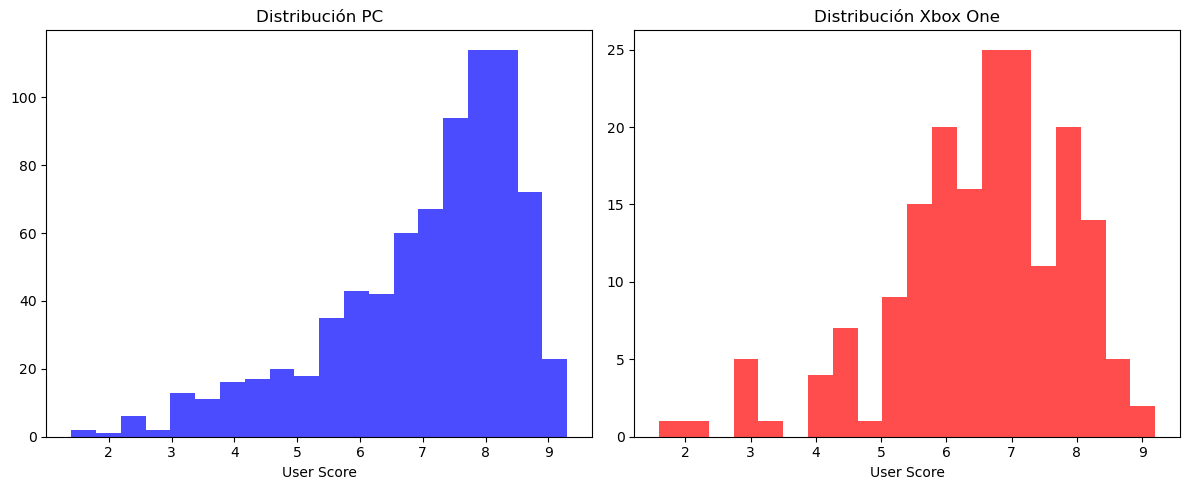

In [81]:
# Verificar normalidad con histogramas
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.hist(pc_scores, bins=20, alpha=0.7, color='blue')
plt.title('Distribución PC')
plt.xlabel('User Score')

plt.subplot(1, 2, 2)
plt.hist(xone_scores, bins=20, alpha=0.7, color='red')
plt.title('Distribución Xbox One')
plt.xlabel('User Score')

plt.tight_layout()
plt.show()

In [82]:
from scipy import stats

# Realizar t-test de dos muestras independientes
t_stat, p_value = stats.ttest_ind(pc_scores, xone_scores)

print("=== RESULTADOS DEL T-TEST ===")
print(f"Estadístico t: {t_stat:.4f}")
print(f"Valor p: {p_value:.4f}")
print(f"Nivel de significancia: 0.05")

# Interpretar resultados
if p_value < 0.05:
    print("\nCONCLUSIÓN: Rechazamos H₀")
    print("Existe diferencia estadísticamente significativa entre las calificaciones")
else:
    print("\nCONCLUSIÓN: No rechazamos H₀") 
    print("No hay evidencia de diferencia significativa entre las calificaciones")

=== RESULTADOS DEL T-TEST ===
Estadístico t: 4.3683
Valor p: 0.0000
Nivel de significancia: 0.05

CONCLUSIÓN: Rechazamos H₀
Existe diferencia estadísticamente significativa entre las calificaciones


### Análisis de comparación de calificaciones entre PC y Xbox One

**Hipótesis:**
- **H₀ (Hipótesis nula):** Las calificaciones promedio de los usuarios para las plataformas **PC** y **Xbox One** son iguales.  
- **H₁ (Hipótesis alternativa):** Las calificaciones promedio de los usuarios para **PC** y **Xbox One** son diferentes.  
 
---

**Formulación de las hipótesis:**  
La hipótesis nula plantea que no existe diferencia significativa entre las calificaciones promedio otorgadas por los usuarios a los juegos de ambas plataformas, es decir, que cualquier variación observada se debe al azar.  
La hipótesis alternativa propone que sí existe una diferencia estadísticamente significativa en las valoraciones, lo que implicaría que la percepción de los usuarios varía según la plataforma.

---

**Criterio de prueba:**  
Se aplicó una **prueba t de Student para dos muestras independientes**, adecuada para comparar medias entre dos grupos distintos (en este caso, PC y Xbox One) cuando los tamaños de muestra son diferentes pero las distribuciones son aproximadamente normales.

El **nivel de significancia** adoptado fue **α = 0.05**, que representa un 5 % de probabilidad de cometer un error tipo I (rechazar una hipótesis nula verdadera).  

**Resultados:**
- Estadístico t = **4.3683**  
- Valor p = **0.0000 (< 0.05)**  

Dado que el valor p es menor que el nivel de significancia, se **rechaza la hipótesis nula**. Esto indica que las diferencias observadas entre las calificaciones promedio (**PC: 7.06**, **Xbox One: 6.52**) no son producto del azar, sino que reflejan una **diferencia estadísticamente significativa** en la percepción de los usuarios hacia los juegos de ambas plataformas.

### 5.2. Segunda Hipótesis: Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son diferentes.

In [83]:
# Filtrar solo géneros Action y Sports
action_sports_data = games[games['genre'].isin(['Action', 'Sports'])]

# Ver cuántos juegos hay por género (incluyendo valores nulos)
print("Cantidad de juegos por género:")
print()
print(action_sports_data['genre'].value_counts())

# Eliminar valores nulos y 'tbd'
action_sports_clean = action_sports_data.dropna(subset=['user_score'])
action_sports_clean = action_sports_clean[action_sports_clean['user_score'] != 'tbd']

# Convertir user_score a numérico
action_sports_clean['user_score'] = pd.to_numeric(action_sports_clean['user_score'])

# Ver cuántos juegos hay por género después de eliminar los valores ausentes
print()
print("Cantidad de juegos por género después de eliminar valores ausentes:")
print()
print(action_sports_clean['genre'].value_counts())

Cantidad de juegos por género:

genre
Action    3369
Sports    2348
Name: count, dtype: int64

Cantidad de juegos por género después de eliminar valores ausentes:

genre
Action    1830
Sports    1103
Name: count, dtype: int64


In [84]:
# Separar las puntuaciones por género
action_scores = action_sports_clean[action_sports_clean['genre'] == 'Action']['user_score']
sports_scores = action_sports_clean[action_sports_clean['genre'] == 'Sports']['user_score']

# Calcular estadísticas descriptivas
print("=== ESTADÍSTICAS DESCRIPTIVAS ===")
print()
print("Action:")
print(f"  Cantidad: {len(action_scores)}")
print(f"  Promedio: {action_scores.mean():.2f}")
print(f"  Desviación estándar: {action_scores.std():.2f}")
print(f"  Mediana: {action_scores.median():.2f}")

print()
print("Sports:")
print(f"  Cantidad: {len(sports_scores)}")
print(f"  Promedio: {sports_scores.mean():.2f}")
print(f"  Desviación estándar: {sports_scores.std():.2f}")
print(f"  Mediana: {sports_scores.median():.2f}")

=== ESTADÍSTICAS DESCRIPTIVAS ===

Action:
  Cantidad: 1830
  Promedio: 7.05
  Desviación estándar: 1.43
  Mediana: 7.40

Sports:
  Cantidad: 1103
  Promedio: 6.96
  Desviación estándar: 1.61
  Mediana: 7.40


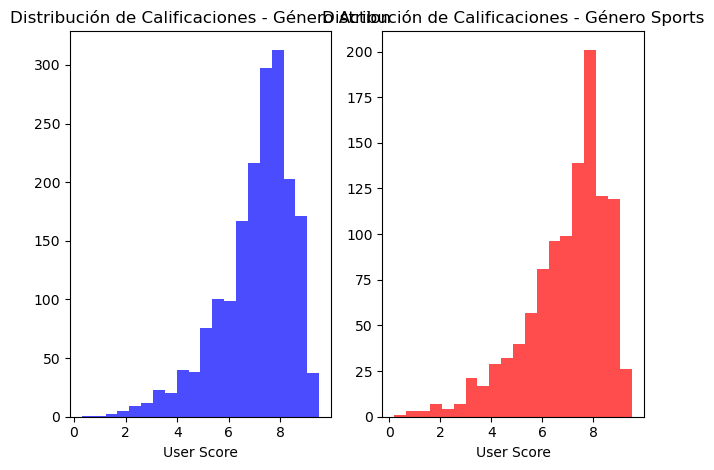

In [85]:
plt.subplot(1, 2, 1)
plt.hist(action_scores, bins=20, alpha=0.7, color='blue')
plt.title('Distribución de Calificaciones - Género Action')
plt.xlabel('User Score')

plt.subplot(1, 2, 2)
plt.hist(sports_scores, bins=20, alpha=0.7, color='red')
plt.title('Distribución de Calificaciones - Género Sports')
plt.xlabel('User Score')

plt.tight_layout()
plt.show()

In [86]:
# Realizar t-test de dos muestras independientes
t_stat, p_value = stats.ttest_ind(action_scores, sports_scores)

print("=== RESULTADOS DEL T-TEST ===")
print(f"Estadístico t: {t_stat:.4f}")
print(f"Valor p: {p_value:.4f}")
print(f"Nivel de significancia: 0.05")

# Interpretar resultados
if p_value < 0.05:
    print("\nCONCLUSIÓN: Rechazamos H₀")
    print("Existe diferencia estadísticamente significativa entre las calificaciones")
else:
    print("\nCONCLUSIÓN: No rechazamos H₀")
    print("No hay evidencia de diferencia significativa entre las calificaciones")

=== RESULTADOS DEL T-TEST ===
Estadístico t: 1.6259
Valor p: 0.1041
Nivel de significancia: 0.05

CONCLUSIÓN: No rechazamos H₀
No hay evidencia de diferencia significativa entre las calificaciones


### Análisis de comparación de calificaciones entre géneros de Acción y Deportes

**Hipótesis:**
- **H₀ (Hipótesis nula):** Las calificaciones promedio de los usuarios para los géneros **Acción** y **Deportes** son iguales.  
- **H₁ (Hipótesis alternativa):** Las calificaciones promedio de los usuarios para los géneros **Acción** y **Deportes** son diferentes.  
  

---

**Formulación de las hipótesis:**  
La hipótesis nula asume que los usuarios califican de forma similar los juegos de ambos géneros, mientras que la alternativa plantea que existe una diferencia significativa en la valoración promedio. Se busca determinar si el tipo de género influye en la percepción de calidad expresada por los usuarios.

---

**Criterio de prueba:**  
Se utilizó una **prueba t de Student para dos muestras independientes**, apropiada para comparar las medias de dos grupos no relacionados.  
El **nivel de significancia** establecido fue **α = 0.05**, lo que implica un 5 % de tolerancia a error tipo I.

**Resultados:**
- Estadístico t = **1.6259**  
- Valor p = **0.1041 (> 0.05)**  

Dado que el valor p es **mayor** que el nivel de significancia, **no se rechaza la hipótesis nula (H₀)**.  
Esto indica que **no hay evidencia estadísticamente significativa** de que las calificaciones promedio difieran entre los géneros **Acción** (media = 7.05) y **Deportes** (media = 6.96). En otras palabras, los usuarios valoran ambos géneros de forma similar en promedio.

### Conclusión general sobre las pruebas de hipótesis

Se realizaron dos pruebas *t* de Student para comparar las calificaciones promedio de los usuarios en distintos contextos.  

En primer lugar, se contrastaron las valoraciones de los usuarios entre las plataformas **PC** y **Xbox One**. Los resultados mostraron una diferencia estadísticamente significativa (**t = 4.37**, **p < 0.001**), por lo que se **rechazó la hipótesis nula**. Esto indica que las calificaciones promedio difieren entre ambas plataformas: los juegos de **PC** presentan en general puntuaciones de usuario más altas que los de **Xbox One**.  

En cambio, al comparar los géneros **Acción** y **Deportes**, el análisis no mostró evidencia suficiente para rechazar la hipótesis nula (**t = 1.63**, **p = 0.10**). Esto sugiere que las diferencias observadas en las medias son atribuibles al azar y **no representan una variación estadísticamente significativa**. En términos prácticos, los usuarios tienden a valorar de manera similar los juegos de ambos géneros.  

En conjunto, los resultados reflejan que **las diferencias en calificaciones de usuarios parecen depender más de la plataforma** que del género del juego, lo que podría vincularse con factores técnicos, expectativas de rendimiento o experiencia de uso específicas de cada sistema.

## Paso 6. Conclusión general

El proyecto permitió realizar un análisis integral del mercado global de videojuegos, desde la preparación de los datos hasta la interpretación estadística de los resultados.  

En las primeras etapas, se efectuó una **limpieza y estandarización exhaustiva del conjunto de datos**, abordando valores ausentes, inconsistencias tipográficas y conversiones de tipo. Estas acciones garantizaron la **fiabilidad y coherencia del dataset**, permitiendo un análisis numérico y categórico preciso. Además, la creación de variables derivadas —como las **ventas totales**— facilitó la evaluación de patrones comerciales a lo largo de más de tres décadas.

Posteriormente, el análisis exploratorio y descriptivo permitió **identificar tendencias históricas** en el lanzamiento de videojuegos, ciclos de vida de plataformas y la concentración del mercado en un número reducido de consolas dominantes (PS2, X360, PS3 y Wii). Se observó también la evolución tecnológica y el impacto del cambio hacia formatos digitales.  

El estudio comparativo por región reveló **diferencias culturales significativas**: mientras Norteamérica y Europa comparten una orientación hacia géneros de acción y deportes, Japón mantiene una fuerte preferencia por los juegos de rol y plataformas portátiles. Estas conclusiones resaltan la importancia de adaptar las estrategias comerciales y de distribución según el perfil del mercado.  

Finalmente, las pruebas de hipótesis confirmaron que las **diferencias en calificaciones de usuarios se relacionan más con la plataforma que con el género**, lo que sugiere que la percepción del jugador depende de la experiencia técnica y del ecosistema de cada sistema, más que del tipo de juego en sí.  

En conjunto, el proyecto demuestra cómo una adecuada **preparación de datos y aplicación de métodos estadísticos** puede generar conclusiones sólidas y aplicables a la toma de decisiones en la industria del entretenimiento interactivo.